In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [4]:
df_train

,회계년도,거래소코드,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,주당순손익,총자본회전률,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG
0,2011,58820,2.210,0.000,20.0,17751704.0,-8.50,56.40,376118.0,640283.0,0.97,785.0,-35.0,0.66,(주)CMG제약,0.506132,1,69.426752,1,0.000000
1,2012,58820,2.555,0.000,20.0,16255389.0,-40.97,-8.43,401085.0,-4205503.0,0.66,1330.0,-138.0,0.39,(주)CMG제약,0.803292,1,-29.924812,0,0.000000
2,2013,58820,2.945,375.055,20.0,20402140.0,1.45,25.51,243898.0,791250.0,0.51,932.0,0.0,0.36,(주)CMG제약,0.140951,0,-2.145923,0,14.256033
3,2014,58820,2.855,435.355,20.0,22752584.0,0.69,11.52,215128.0,442322.0,0.46,912.0,2.0,0.40,(주)CMG제약,0.184647,2,131.359649,1,23.557141
4,2015,58820,5.915,0.000,20.0,27041894.0,-13.50,18.85,195671.0,-2572168.0,0.56,2110.0,-42.0,0.47,(주)CMG제약,0.207355,2,50.710900,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7548,2013,25530,0.735,435.355,30.0,186255266.0,8.90,-1.97,3573572.0,20107873.0,0.96,4950.0,0.0,0.81,(주)에스제이엠홀딩스,0.018116,2,-5.858586,0,-5.993485
7549,2014,25530,0.635,9.805,30.0,161934964.0,10.45,-13.06,5748432.0,20730328.0,0.81,4660.0,0.0,0.69,(주)에스제이엠홀딩스,0.018116,2,24.678112,1,-2.618242
7550,2015,25530,0.630,7.085,30.0,185141914.0,13.39,14.33,0.0,23545362.0,0.88,5810.0,0.0,0.74,(주)에스제이엠홀딩스,0.098414,2,-10.154905,0,0.101062
7551,2016,25530,0.630,14.515,30.0,181367297.0,8.36,-2.04,0.0,13611422.0,0.81,5220.0,0.0,0.67,(주)에스제이엠홀딩스,0.104776,2,-8.045977,0,0.066509


In [115]:
df_test

,회계년도,거래소코드,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,주당순손익,총자본회전률,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG
0,2018,58820,7.185,113.690,30.0,4.986478e+07,12.16,20.05,505130.0,2567820.0,0.49,4235.0,0.0,0.45,(주)CMG제약,0.099999,1,0.354191,0,2.302342
1,2018,590,0.585,56.590,30.0,1.225509e+08,10.32,1.32,0.0,13319440.0,0.45,63900.0,0.0,0.40,CS홀딩스(주),0.046186,2,-8.450704,0,-1.239002
2,2018,10120,1.780,16.090,10.0,2.484978e+09,5.32,6.03,16628000.0,205047548.0,2.03,49000.0,0.0,1.07,LS일렉트릭(주),0.814721,1,11.428571,1,0.812819
3,2018,11070,1.865,23.410,10.0,7.982104e+09,2.04,4.46,0.0,263517410.0,3.92,86400.0,0.0,1.37,LG이노텍(주),1.633317,2,62.037037,1,0.541023
4,2018,1940,0.290,13.505,30.0,1.314755e+09,2.76,7.66,0.0,62375860.0,1.04,13750.0,0.0,0.87,KISCO홀딩스(주),0.018116,2,-6.909091,0,-0.266356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2018,10580,1.705,15.820,20.0,7.399840e+07,-1.81,-58.01,762348.0,-1016490.0,1.12,680.0,-89.0,0.82,(주)에스엠벡셀,1.375648,1,23.382353,1,0.441852
1075,2018,41510,2.685,81.095,30.0,6.122275e+08,3.83,67.56,23694980.0,47746037.0,1.21,52300.0,0.0,0.68,(주)에스엠엔터테인먼트,0.385989,2,-26.481836,0,2.246915
1076,2018,4060,0.820,27.880,30.0,3.202022e+08,2.09,12.18,1226233.0,3937720.0,1.64,736.0,33.0,0.97,(주)에스지세계물산,0.685426,0,22.826087,1,0.956655
1077,2018,123700,0.465,25.870,20.0,1.552595e+08,2.40,-4.81,0.0,742003.0,0.92,3020.0,0.0,0.77,(주)에스제이엠,0.148879,2,27.152318,1,-0.845054


In [116]:
df_kosipkosdaq = pd.read_csv('./data.csv')
df_kosipkosdaq

,회사명,거래소코드,회계년도,자산(*)(IFRS)(천원),자본(*)(IFRS)(천원),부채(*)(IFRS)(천원),매출액(영업수익)(*)(연결)(천원),*주당순손익(IFRS연결)(천원),경상연구개발비(IFRS연결)(천원),광고 및 판매촉진비(IFRS연결)(천원),...,[공통]PBR(최고)(IFRS),[공통]PBR(최저)(IFRS),[공통]PCR(최고)(IFRS),[공통]PCR(최저)(IFRS),[공통]PSR(최고)(IFRS),[공통]PSR(최저)(IFRS),기업규모코드,기업규모명,외국인_주식수(주),외국인_주식분포비율
0,(주)BNK금융지주,138930,2011/12,3.249906e+09,2.727816e+09,5.220902e+08,3.057370e+09,2120.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,90.0,기타,110072149.0,56.92
1,(주)BNK금융지주,138930,2012/12,3.403623e+09,2.740568e+09,6.630553e+08,3.048983e+09,1869.0,0.0,0.0,...,1.07,0.76,35.54,25.25,24.81,17.63,90.0,기타,119906064.0,62.01
2,(주)BNK금융지주,138930,2013/12,3.507652e+09,2.737860e+09,7.697917e+08,3.162829e+09,0.0,0.0,0.0,...,1.24,0.94,51.66,39.19,31.64,24.00,90.0,기타,114353856.0,59.13
3,(주)BNK금융지주,138930,2014/12,4.539500e+09,3.550847e+09,9.886534e+08,4.583363e+09,0.0,0.0,0.0,...,1.08,0.86,10.75,8.58,9.37,7.48,90.0,기타,122094107.0,52.09
4,(주)BNK금융지주,138930,2015/12,5.244360e+09,4.086109e+09,1.158250e+09,5.174026e+09,0.0,0.0,0.0,...,1.07,0.52,0.00,0.00,66.25,31.97,90.0,기타,117256395.0,45.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18459,흥아해운(주),3280,2015/12,7.712121e+08,1.618245e+08,6.093875e+08,8.451154e+08,126.0,0.0,0.0,...,2.22,0.83,10.45,3.92,0.44,0.17,30.0,중견기업,28729650.0,33.91
18460,흥아해운(주),3280,2016/12,9.425868e+08,1.838293e+08,7.587575e+08,8.317461e+08,-170.0,0.0,0.0,...,1.48,0.62,0.00,0.00,0.34,0.14,30.0,중견기업,27238474.0,26.52
18461,흥아해운(주),3280,2017/12,8.341074e+08,1.076150e+08,7.264924e+08,8.364275e+08,-581.0,0.0,0.0,...,2.80,0.85,0.00,0.00,0.38,0.12,30.0,중견기업,33714404.0,26.40
18462,흥아해운(주),3280,2018/12,7.827870e+08,5.673155e+07,7.260555e+08,7.538656e+08,0.0,0.0,0.0,...,2.97,1.09,0.00,0.00,0.24,0.09,30.0,중견기업,48009214.0,27.33


In [117]:
df_kosipkosdaq = df_kosipkosdaq.loc[df_kosipkosdaq['회계년도'] == '2011/12']

In [118]:
df_kosipkosdaq.set_index('거래소코드').index

Int64Index([138930,  58820,    990,  50120,  97230, 105560,  23150,   2360,
              9160, 100840,
            ...
             61250,  10660,    850,  16580,  94280, 192410,  90710, 145020,
             24060,   3280],
           dtype='int64', name='거래소코드', length=1722)

In [121]:
df_test.set_index('거래소코드').index

Int64Index([ 58820,    590,  10120,  11070,   1940,  16380,  44180,  24120,
             10240,  39130,
            ...
             48550,   1380,  12750,   7820,  63440,  10580,  41510,   4060,
            123700,  25530],
           dtype='int64', name='거래소코드', length=1079)

In [56]:
df_test['투자신호'].value_counts()

0    664
1    415
Name: 투자신호, dtype: int64

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7553 entries, 0 to 7552
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   회계년도     7553 non-null   int64  
 1   거래소코드    7553 non-null   int64  
 2   PBR      7553 non-null   float64
 3   PER      7553 non-null   float64
 4   기업규모코드   7553 non-null   float64
 5   매출액      7553 non-null   float64
 6   매출액순이익률  7553 non-null   float64
 7   매출액증가율   7553 non-null   float64
 8   성장비용     7553 non-null   float64
 9   영업손익     7553 non-null   float64
 10  자기자본회전률  7553 non-null   float64
 11  종가       7553 non-null   float64
 12  주당순손익    7553 non-null   float64
 13  총자본회전률   7553 non-null   float64
 14  회사명      7553 non-null   object 
 15  부채자본비율   7553 non-null   float64
 16  현금흐름스코어  7553 non-null   int64  
 17  수익률      7553 non-null   float64
 18  투자신호     7553 non-null   int64  
 19  PEG      7553 non-null   float64
dtypes: float64(15), int64(4), object(1)
memory usage: 1.

In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   회계년도     1079 non-null   int64  
 1   거래소코드    1079 non-null   int64  
 2   PBR      1079 non-null   float64
 3   PER      1079 non-null   float64
 4   기업규모코드   1079 non-null   float64
 5   매출액      1079 non-null   float64
 6   매출액순이익률  1079 non-null   float64
 7   매출액증가율   1079 non-null   float64
 8   성장비용     1079 non-null   float64
 9   영업손익     1079 non-null   float64
 10  자기자본회전률  1079 non-null   float64
 11  종가       1079 non-null   float64
 12  주당순손익    1079 non-null   float64
 13  총자본회전률   1079 non-null   float64
 14  회사명      1079 non-null   object 
 15  부채자본비율   1079 non-null   float64
 16  현금흐름스코어  1079 non-null   int64  
 17  수익률      1079 non-null   float64
 18  투자신호     1079 non-null   int64  
 19  PEG      1079 non-null   float64
dtypes: float64(15), int64(4), object(1)
memory usage: 16

In [59]:
# 무한대 값 최고값으로 대체하기
df_test['PEG'][np.isinf(df_test['PEG'])] = np.finfo(float).max
df_train['PEG'][np.isinf(df_train['PEG'])] = np.finfo(float).max

In [60]:
df_train['PEG'].value_counts()

 1000.000000    1392
 0.000000        775
-20.645571        76
-1.578984          1
-0.205762          1
                ... 
 0.210971          1
 0.374875          1
 0.025065          1
-2.984372          1
 0.203981          1
Name: PEG, Length: 5313, dtype: int64

In [61]:
df_test['PEG'].value_counts()

 1000.000000    235
-0.000000       109
-20.645571       11
 2.302342         1
 0.647476         1
               ... 
 0.463210         1
 0.226838         1
 0.323015         1
 0.980309         1
-0.519606         1
Name: PEG, Length: 727, dtype: int64

In [62]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,roc_auc_score, mean_squared_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

import warnings 
warnings.filterwarnings("ignore")

In [63]:
df_train = pd.get_dummies(df_train, columns=['기업규모코드'])
df_test = pd.get_dummies(df_test, columns=['기업규모코드'])

In [64]:
df_train = df_train.drop(['회사명', '수익률', '종가', '회계년도', '거래소코드', '매출액', '주당순손익', '총자본회전률'], axis=1)
df_test = df_test.drop(['회사명', '수익률', '종가', '회계년도', '거래소코드', '매출액', '주당순손익', '총자본회전률'], axis=1)

In [65]:
df_train.columns

Index(['PBR', 'PER', '매출액순이익률', '매출액증가율', '성장비용', '영업손익', '자기자본회전률', '부채자본비율',
       '현금흐름스코어', '투자신호', 'PEG', '기업규모코드_10.0', '기업규모코드_20.0', '기업규모코드_30.0',
       '기업규모코드_90.0'],
      dtype='object')

In [66]:
df_test.columns

Index(['PBR', 'PER', '매출액순이익률', '매출액증가율', '성장비용', '영업손익', '자기자본회전률', '부채자본비율',
       '현금흐름스코어', '투자신호', 'PEG', '기업규모코드_10.0', '기업규모코드_20.0', '기업규모코드_30.0',
       '기업규모코드_90.0'],
      dtype='object')

In [67]:
df_train

,PBR,PER,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,부채자본비율,현금흐름스코어,투자신호,PEG,기업규모코드_10.0,기업규모코드_20.0,기업규모코드_30.0,기업규모코드_90.0
0,2.210,0.000,-8.50,56.40,376118.0,640283.0,0.97,0.506132,1,1,0.000000,0,1,0,0
1,2.555,0.000,-40.97,-8.43,401085.0,-4205503.0,0.66,0.803292,1,0,0.000000,0,1,0,0
2,2.945,375.055,1.45,25.51,243898.0,791250.0,0.51,0.140951,0,0,14.256033,0,1,0,0
3,2.855,435.355,0.69,11.52,215128.0,442322.0,0.46,0.184647,2,1,23.557141,0,1,0,0
4,5.915,0.000,-13.50,18.85,195671.0,-2572168.0,0.56,0.207355,2,1,0.000000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7548,0.735,435.355,8.90,-1.97,3573572.0,20107873.0,0.96,0.018116,2,0,-5.993485,0,0,1,0
7549,0.635,9.805,10.45,-13.06,5748432.0,20730328.0,0.81,0.018116,2,1,-2.618242,0,0,1,0
7550,0.630,7.085,13.39,14.33,0.0,23545362.0,0.88,0.098414,2,0,0.101062,0,0,1,0
7551,0.630,14.515,8.36,-2.04,0.0,13611422.0,0.81,0.104776,2,0,0.066509,0,0,1,0


In [68]:
## df_train, 즉 train 데이터의 피쳐와 타겟 설정

X = df_train.drop(['투자신호'], axis=1)
y = df_train["투자신호"]


In [69]:
## cross_val_score( )
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import load_iris
import numpy as np

ra_clf = RandomForestClassifier(random_state=156)


# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(ra_clf , X , y , scoring='accuracy',cv=5)
#print(scores, type(scores))
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.5864 0.5711 0.5897 0.5914 0.5669]
평균 검증 정확도: 0.5811


In [70]:
## train 데이터를 train, validation 데이터로 나누기 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=58,stratify=y)

In [71]:
## df_test, 즉 test 데이터의 피쳐와 타겟 설정

X_test = df_test.drop(['투자신호'], axis=1)
y_test = df_test["투자신호"]

In [72]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler

scalar = MinMaxScaler()
df_train = scalar.fit_transform(df_train)
df_test = scalar.transform(df_test)

In [73]:
from sklearn import metrics

def modeling(model, X_train, X_val, y_train, y_val):
    model.fit(X_train,y_train)
    pred_val = model.predict(X_val)
    print(classification_report(y_val, pred_val))

    
de_clf = DecisionTreeClassifier(random_state=200)
ra_clf = RandomForestClassifier(random_state = 30, bootstrap= True, max_depth = 4, max_features = 'auto', min_samples_leaf = 2, min_samples_split=5, n_estimators = 100)
xgb = XGBClassifier()
log = LogisticRegression(random_state=500, C=1, dual=True, fit_intercept=False, max_iter=100, penalty='l2', solver='liblinear', verbose=0)

In [74]:
de_clf.fit(X_train , y_train)
pred = de_clf.predict(X_test)
print('DecisionTree 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))
modeling(de_clf, X_train, X_val, y_train, y_val)

DecisionTree 분류기 정확도: 0.5338
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       876
           1       0.42      0.40      0.41       635

    accuracy                           0.52      1511
   macro avg       0.50      0.50      0.50      1511
weighted avg       0.51      0.52      0.51      1511



In [75]:
ra_clf.fit(X_train , y_train)
pred = ra_clf.predict(X_test)
print('RandomForest 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))
modeling(ra_clf, X_train, X_val, y_train, y_val)

RandomForest 분류기 정확도: 0.6108
              precision    recall  f1-score   support

           0       0.59      0.97      0.73       876
           1       0.65      0.08      0.14       635

    accuracy                           0.59      1511
   macro avg       0.62      0.52      0.44      1511
weighted avg       0.61      0.59      0.49      1511



In [76]:
xgb.fit(X_train , y_train)
pred = xgb.predict(X_test)
print('XGB 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))
modeling(xgb, X_train, X_val, y_train, y_val)

XGB 분류기 정확도: 0.5783
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       876
           1       0.46      0.37      0.41       635

    accuracy                           0.55      1511
   macro avg       0.53      0.53      0.52      1511
weighted avg       0.54      0.55      0.54      1511



In [77]:
log.fit(X_train , y_train)
pred = log.predict(X_test)
print('LogisticRegression 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))
modeling(log, X_train, X_val, y_train, y_val)

LogisticRegression 분류기 정확도: 0.4875
              precision    recall  f1-score   support

           0       0.55      0.21      0.31       876
           1       0.41      0.76      0.53       635

    accuracy                           0.44      1511
   macro avg       0.48      0.49      0.42      1511
weighted avg       0.49      0.44      0.40      1511



In [78]:
import FinanceDataReader as fdr

In [79]:
df_pred1signal0 = pd.read_csv('./pred1signal0.csv')
df_pred1signal1 = pd.read_csv('./pred1signal1.csv')

In [80]:
def padding(x):
    return x.rjust(6, "0")

df_pred1signal0['거래소코드'] = df_pred1signal0['거래소코드'].astype('str')
df_pred1signal0['거래소코드'] = df_pred1signal0['거래소코드'].map(padding)

In [81]:
def padding(x):
    return x.rjust(6, "0")

df_pred1signal1['거래소코드'] = df_pred1signal1['거래소코드'].astype('str')
df_pred1signal1['거래소코드'] = df_pred1signal1['거래소코드'].map(padding)

In [82]:
df_pred1signal0

,Unnamed: 0,회계년도,거래소코드,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,...,자기자본회전률,종가,주당순손익,총자본회전률,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG
0,4,2018,001940,0.290,13.505,30.0,1.314755e+09,2.76,7.66,0.0,...,1.04,13750.0,0.0,0.87,KISCO홀딩스(주),0.018116,2,-6.909091,0,-0.266356
1,7,2018,024120,0.710,5.745,30.0,1.518638e+08,8.40,-7.55,0.0,...,1.69,5410.0,0.0,1.03,KB오토시스(주),0.454741,2,14.232902,1,0.808637
2,18,2018,064960,0.880,10.465,30.0,1.058426e+09,5.41,-6.95,0.0,...,1.28,27050.0,0.0,0.87,SNT모티브(주),0.430875,2,58.040665,1,-0.894863
3,19,2018,003570,0.395,14.295,30.0,3.962591e+08,5.00,-9.17,0.0,...,0.65,7200.0,733.0,0.47,SNT중공업(주),0.362920,2,-8.194444,0,-0.831118
4,20,2018,071970,0.815,0.000,30.0,2.148077e+08,-48.75,-14.91,5369544.0,...,1.43,5670.0,-1808.0,0.33,STX중공업(주),2.689555,1,-46.119929,0,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,1056,2018,084850,0.000,0.000,30.0,2.282371e+08,7.96,13.06,0.0,...,3.06,4285.0,0.0,1.04,(주)아이티엠반도체,1.361575,2,890.665111,1,0.000000
181,1058,2018,059120,1.925,17.390,20.0,8.086266e+07,1.06,8.24,0.0,...,2.66,7690.0,1793.0,1.05,(주)아진엑스텍,0.076744,2,-0.520156,0,0.501817
182,1065,2018,123750,2.165,0.000,20.0,4.908004e+07,-4.65,12.97,0.0,...,1.68,3860.0,-181.0,0.87,(주)알톤스포츠,0.728656,1,-67.746114,0,0.000000
183,1073,2018,063440,2.500,0.000,20.0,2.003135e+07,-10.07,-39.81,175403.0,...,0.44,1485.0,0.0,0.39,(주)에스엠라이프디자인그룹,0.102250,2,36.700337,1,0.000000


In [83]:
df_pred1signal1

,Unnamed: 0,회계년도,거래소코드,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,...,자기자본회전률,종가,주당순손익,총자본회전률,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG
0,6,2018,044180,2.175,0.000,20.0,4.142521e+07,-41.10,84.92,0.0,...,1.30,108.0,0.0,0.34,KD(주),3.572279,0,358.333333,1,1000.000000
1,7,2018,024120,0.710,5.745,30.0,1.518638e+08,8.40,-7.55,0.0,...,1.69,5410.0,0.0,1.03,KB오토시스(주),0.454741,2,14.232902,1,0.808637
2,15,2018,004800,1.210,0.695,10.0,2.991006e+09,33.52,-58.01,0.0,...,0.91,50000.0,0.0,0.29,(주)효성,0.134557,2,58.200000,1,0.004817
3,18,2018,064960,0.880,10.465,30.0,1.058426e+09,5.41,-6.95,0.0,...,1.28,27050.0,0.0,0.87,SNT모티브(주),0.430875,2,58.040665,1,-0.894863
4,30,2018,002140,0.900,24.395,30.0,1.584300e+08,2.34,-9.22,0.0,...,1.75,2170.0,0.0,0.80,고려산업(주),1.330794,1,54.838710,1,-1.646371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1033,2018,060540,1.020,17.505,30.0,1.339412e+08,5.08,37.64,3078397.0,...,1.71,1755.0,0.0,1.08,(주)에스에이티,0.076186,2,26.780627,1,1.725778
86,1042,2018,052860,2.285,45.645,20.0,3.130391e+07,4.15,-27.08,3627972.0,...,0.75,3075.0,0.0,0.50,(주)아이앤씨테크놀로지,0.381181,2,71.382114,1,1.691762
87,1051,2018,090150,0.890,0.000,20.0,9.378670e+07,-2.69,-3.50,0.0,...,2.45,2295.0,0.0,0.95,(주)아이윈,1.930304,1,47.058824,1,1000.000000
88,1056,2018,084850,0.000,0.000,30.0,2.282371e+08,7.96,13.06,0.0,...,3.06,4285.0,0.0,1.04,(주)아이티엠반도체,1.361575,2,890.665111,1,0.000000


In [84]:
df_pred1signal1.columns

Index(['Unnamed: 0', '회계년도', '거래소코드', 'PBR', 'PER', '기업규모코드', '매출액', '매출액순이익률',
       '매출액증가율', '성장비용', '영업손익', '자기자본회전률', '종가', '주당순손익', '총자본회전률', '회사명',
       '부채자본비율', '현금흐름스코어', '수익률', '투자신호', 'PEG'],
      dtype='object')

In [85]:
df_pred1signal1.columns.nunique()

21

In [86]:
df_pred1signal0.columns

Index(['Unnamed: 0', '회계년도', '거래소코드', 'PBR', 'PER', '기업규모코드', '매출액', '매출액순이익률',
       '매출액증가율', '성장비용', '영업손익', '자기자본회전률', '종가', '주당순손익', '총자본회전률', '회사명',
       '부채자본비율', '현금흐름스코어', '수익률', '투자신호', 'PEG'],
      dtype='object')

In [87]:
df_pred1signal0.columns.nunique()

21

In [88]:
df_pred1signal1 = df_pred1signal1.drop(['Unnamed: 0', '총자본회전률', '주당순손익'], axis=1)
df_pred1signal0 = df_pred1signal0.drop(['Unnamed: 0', '총자본회전률', '주당순손익'], axis=1)

In [89]:
df_pred1signal1['성장비용비율'] = df_pred1signal1['성장비용'] / df_pred1signal1['매출액']
df_pred1signal0['성장비용비율'] = df_pred1signal0['성장비용'] / df_pred1signal0['매출액']

In [90]:
df_pred1signal1 = df_pred1signal1.set_index(['거래소코드'])

In [91]:
df_pred1signal1

,회계년도,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG,성장비용비율
거래소코드,,,,,,,,,,,,,,,,,,
044180,2018,2.175,0.000,20.0,4.142521e+07,-41.10,84.92,0.0,-9636962.0,1.30,108.0,KD(주),3.572279,0,358.333333,1,1000.000000,0.000000
024120,2018,0.710,5.745,30.0,1.518638e+08,8.40,-7.55,0.0,14567948.0,1.69,5410.0,KB오토시스(주),0.454741,2,14.232902,1,0.808637,0.000000
004800,2018,1.210,0.695,10.0,2.991006e+09,33.52,-58.01,0.0,143483398.0,0.91,50000.0,(주)효성,0.134557,2,58.200000,1,0.004817,0.000000
064960,2018,0.880,10.465,30.0,1.058426e+09,5.41,-6.95,0.0,56281777.0,1.28,27050.0,SNT모티브(주),0.430875,2,58.040665,1,-0.894863,0.000000
002140,2018,0.900,24.395,30.0,1.584300e+08,2.34,-9.22,0.0,5809620.0,1.75,2170.0,고려산업(주),1.330794,1,54.838710,1,-1.646371,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
060540,2018,1.020,17.505,30.0,1.339412e+08,5.08,37.64,3078397.0,7334253.0,1.71,1755.0,(주)에스에이티,0.076186,2,26.780627,1,1.725778,0.022983
052860,2018,2.285,45.645,20.0,3.130391e+07,4.15,-27.08,3627972.0,1828941.0,0.75,3075.0,(주)아이앤씨테크놀로지,0.381181,2,71.382114,1,1.691762,0.115895
090150,2018,0.890,0.000,20.0,9.378670e+07,-2.69,-3.50,0.0,-2629696.0,2.45,2295.0,(주)아이윈,1.930304,1,47.058824,1,1000.000000,0.000000


In [92]:
df_pred1signal0 = df_pred1signal0.set_index(['거래소코드'])

In [93]:
df_pred1signal0

,회계년도,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG,성장비용비율
거래소코드,,,,,,,,,,,,,,,,,,
001940,2018,0.290,13.505,30.0,1.314755e+09,2.76,7.66,0.0,62375860.0,1.04,13750.0,KISCO홀딩스(주),0.018116,2,-6.909091,0,-0.266356,0.000000
024120,2018,0.710,5.745,30.0,1.518638e+08,8.40,-7.55,0.0,14567948.0,1.69,5410.0,KB오토시스(주),0.454741,2,14.232902,1,0.808637,0.000000
064960,2018,0.880,10.465,30.0,1.058426e+09,5.41,-6.95,0.0,56281777.0,1.28,27050.0,SNT모티브(주),0.430875,2,58.040665,1,-0.894863,0.000000
003570,2018,0.395,14.295,30.0,3.962591e+08,5.00,-9.17,0.0,16103600.0,0.65,7200.0,SNT중공업(주),0.362920,2,-8.194444,0,-0.831118,0.000000
071970,2018,0.815,0.000,30.0,2.148077e+08,-48.75,-14.91,5369544.0,-14501436.0,1.43,5670.0,STX중공업(주),2.689555,1,-46.119929,0,1000.000000,0.024997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
084850,2018,0.000,0.000,30.0,2.282371e+08,7.96,13.06,0.0,21081087.0,3.06,4285.0,(주)아이티엠반도체,1.361575,2,890.665111,1,0.000000,0.000000
059120,2018,1.925,17.390,20.0,8.086266e+07,1.06,8.24,0.0,1905642.0,2.66,7690.0,(주)아진엑스텍,0.076744,2,-0.520156,0,0.501817,0.000000
123750,2018,2.165,0.000,20.0,4.908004e+07,-4.65,12.97,0.0,-1191032.0,1.68,3860.0,(주)알톤스포츠,0.728656,1,-67.746114,0,0.000000,0.000000


In [94]:
df_pred1signal1.to_csv('./df_pred1signal1(16col).csv')

In [95]:
df_pred1signal1

,회계년도,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG,성장비용비율
거래소코드,,,,,,,,,,,,,,,,,,
044180,2018,2.175,0.000,20.0,4.142521e+07,-41.10,84.92,0.0,-9636962.0,1.30,108.0,KD(주),3.572279,0,358.333333,1,1000.000000,0.000000
024120,2018,0.710,5.745,30.0,1.518638e+08,8.40,-7.55,0.0,14567948.0,1.69,5410.0,KB오토시스(주),0.454741,2,14.232902,1,0.808637,0.000000
004800,2018,1.210,0.695,10.0,2.991006e+09,33.52,-58.01,0.0,143483398.0,0.91,50000.0,(주)효성,0.134557,2,58.200000,1,0.004817,0.000000
064960,2018,0.880,10.465,30.0,1.058426e+09,5.41,-6.95,0.0,56281777.0,1.28,27050.0,SNT모티브(주),0.430875,2,58.040665,1,-0.894863,0.000000
002140,2018,0.900,24.395,30.0,1.584300e+08,2.34,-9.22,0.0,5809620.0,1.75,2170.0,고려산업(주),1.330794,1,54.838710,1,-1.646371,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
060540,2018,1.020,17.505,30.0,1.339412e+08,5.08,37.64,3078397.0,7334253.0,1.71,1755.0,(주)에스에이티,0.076186,2,26.780627,1,1.725778,0.022983
052860,2018,2.285,45.645,20.0,3.130391e+07,4.15,-27.08,3627972.0,1828941.0,0.75,3075.0,(주)아이앤씨테크놀로지,0.381181,2,71.382114,1,1.691762,0.115895
090150,2018,0.890,0.000,20.0,9.378670e+07,-2.69,-3.50,0.0,-2629696.0,2.45,2295.0,(주)아이윈,1.930304,1,47.058824,1,1000.000000,0.000000


In [96]:
df_pred1signal1.index

Index(['044180', '024120', '004800', '064960', '002140', '010690', '039340',
       '021650', '017900', '079960', '030720', '104460', '030190', '003220',
       '106080', '079370', '051160', '023810', '069330', '054210', '065440',
       '005950', '123570', '033830', '131290', '019180', '062860', '027710',
       '068050', '065130', '029460', '052900', '105330', '056360', '009180',
       '007770', '065710', '036830', '002870', '107590', '054540', '010280',
       '036200', '038680', '054930', '143240', '023000', '005360', '038460',
       '100220', '082800', '018680', '115570', '050890', '013000', '092730',
       '130580', '121600', '100840', '009160', '097230', '038530', '043360',
       '079810', '068790', '066900', '012700', '060240', '099410', '031860',
       '376190', '108320', '033310', '050760', '044780', '073540', '036810',
       '104830', '044340', '008600', '006980', '045060', '042110', '083930',
       '101490', '060540', '052860', '090150', '084850', '063440'],
      dt

<AxesSubplot: xlabel='PBR', ylabel='Density'>

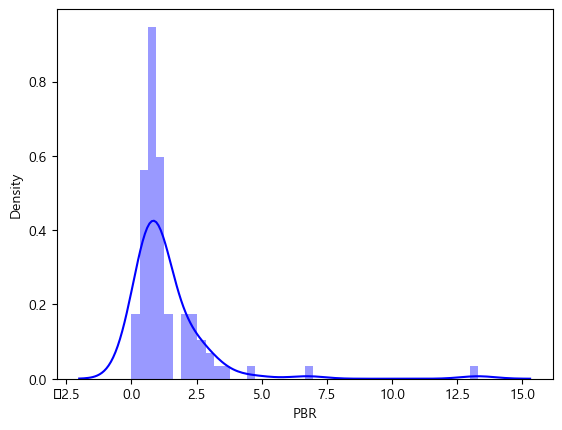

In [97]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df_pred1signal1["PBR"], 

             color="blue")

<AxesSubplot: xlabel='부채자본비율', ylabel='Density'>

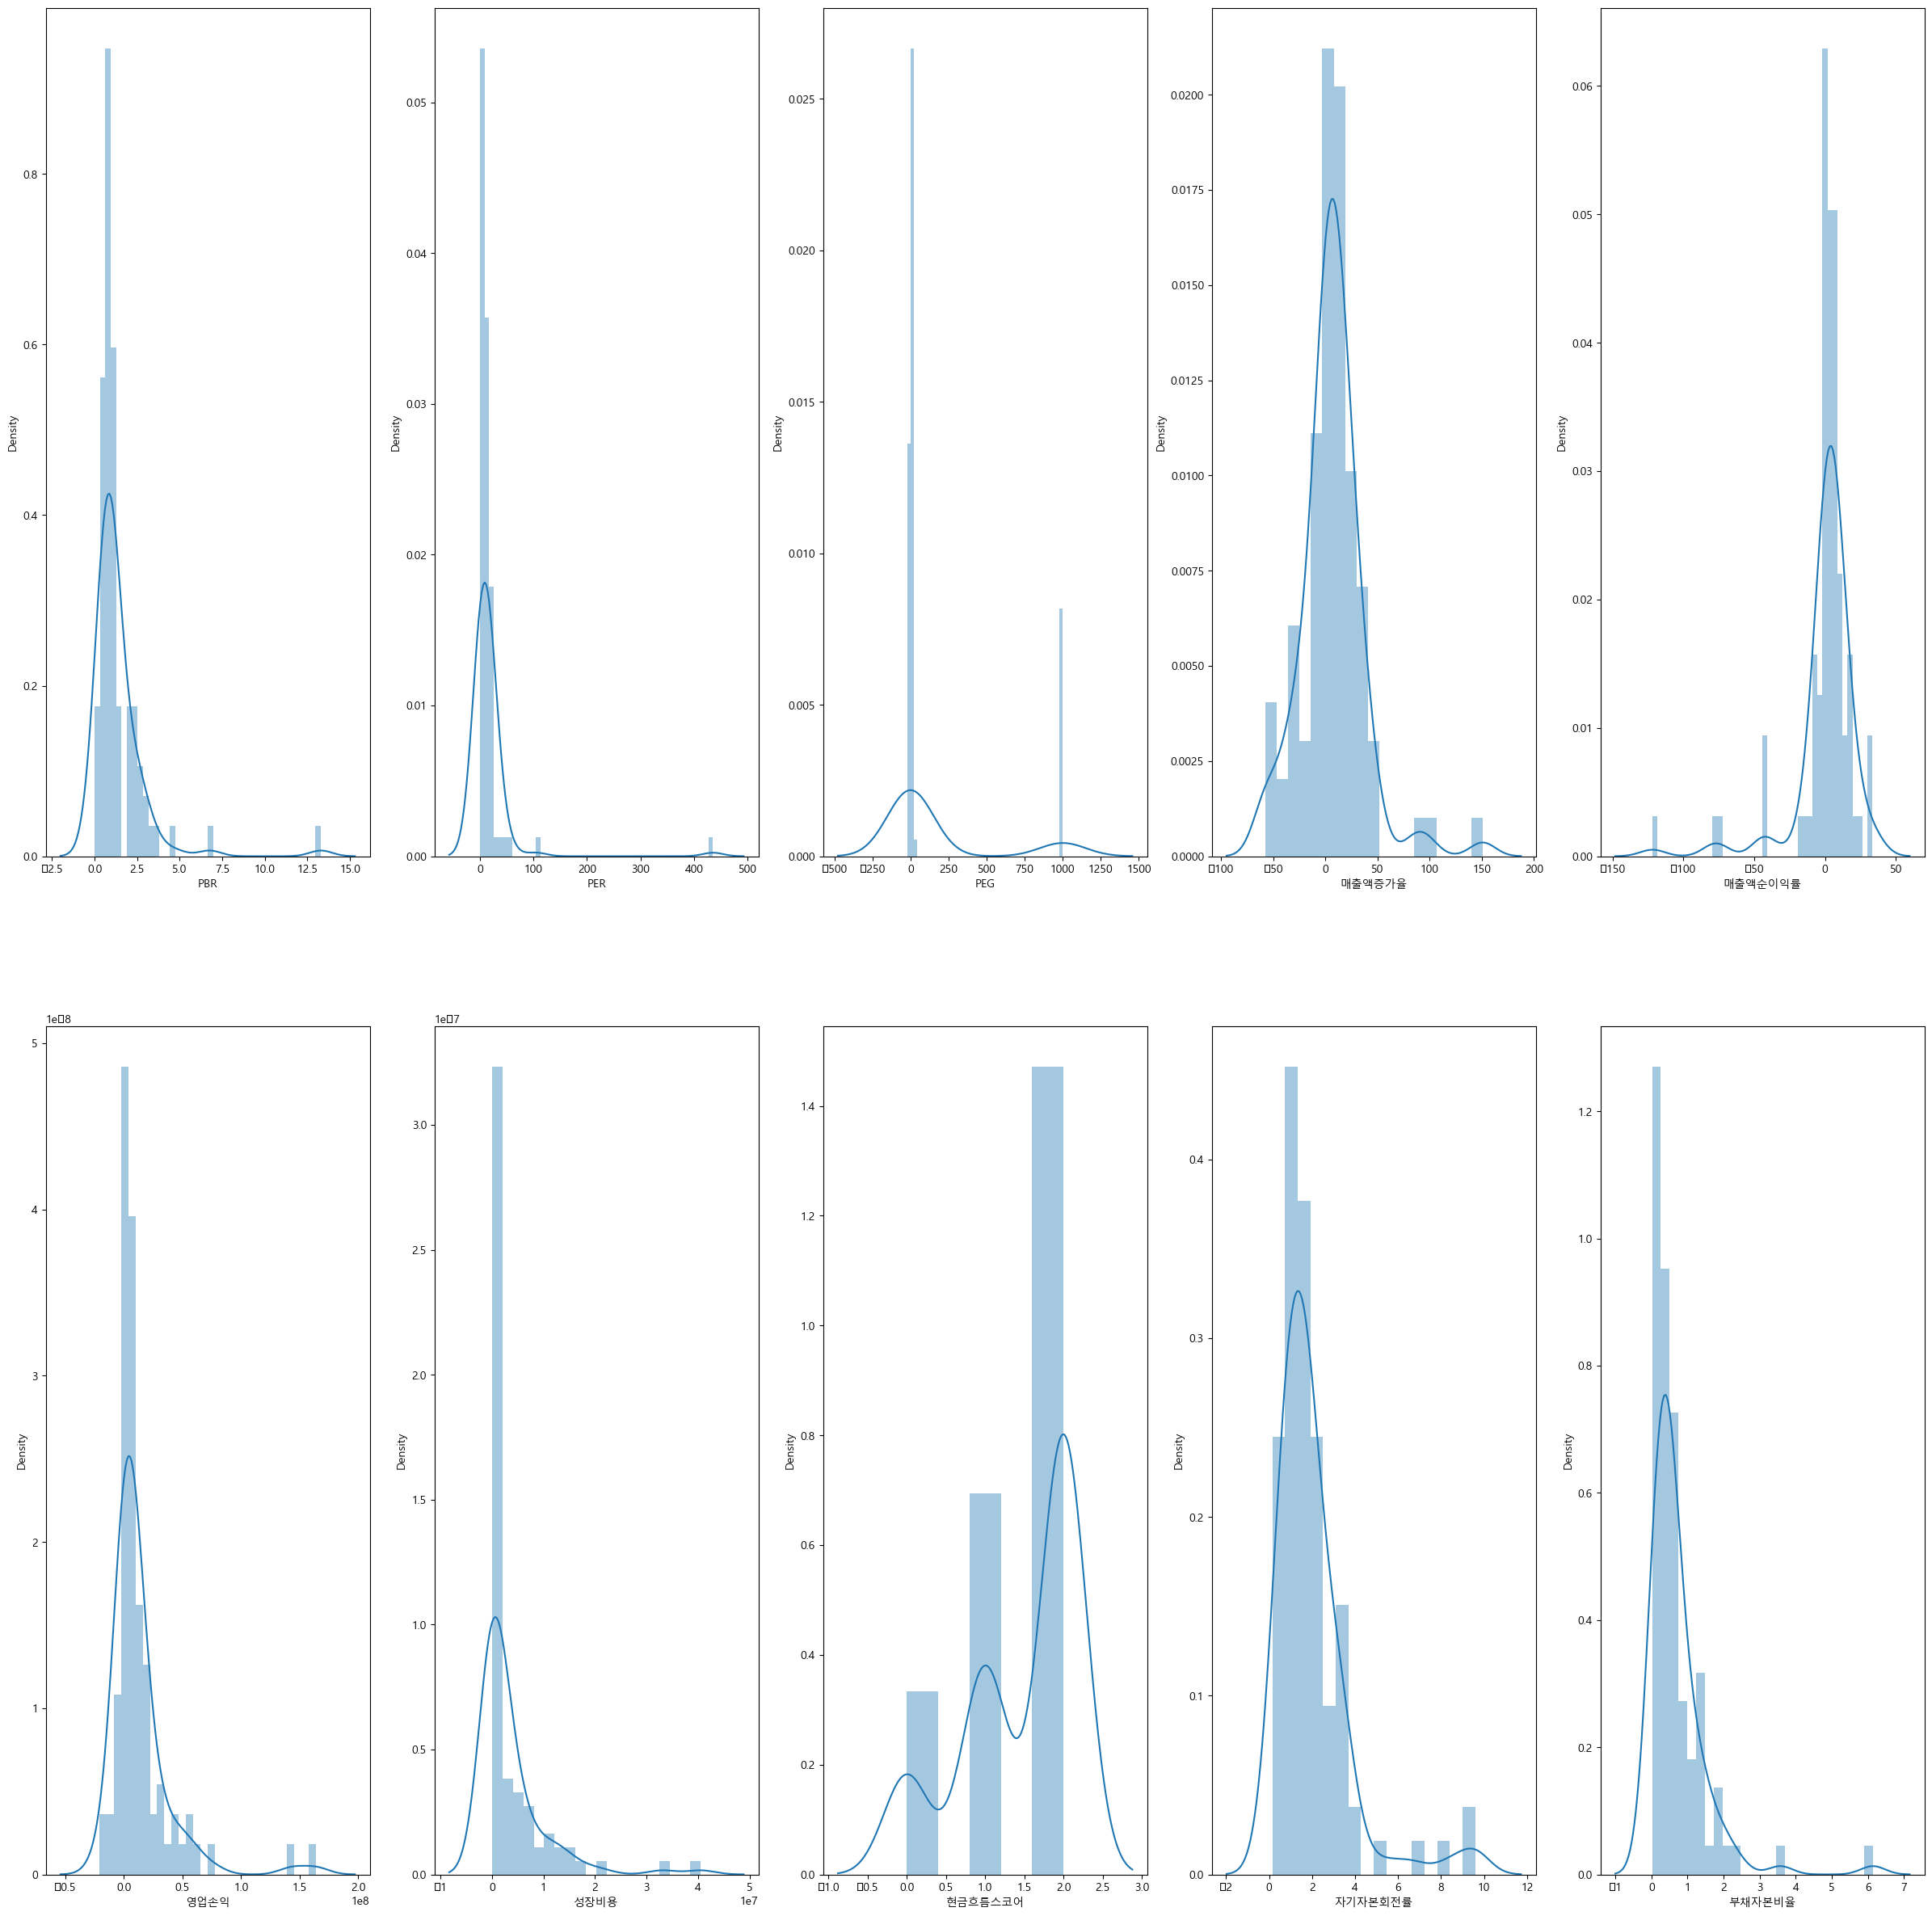

In [98]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(30,30)) 

sns.distplot(df_pred1signal1["PBR"], ax=ax[0,0])
sns.distplot(df_pred1signal1["PER"], ax=ax[0,1])
sns.distplot(df_pred1signal1["PEG"], ax=ax[0,2])
sns.distplot(df_pred1signal1["매출액증가율"], ax=ax[0,3])
sns.distplot(df_pred1signal1["매출액순이익률"], ax=ax[0,4])
sns.distplot(df_pred1signal1["영업손익"], ax=ax[1,0])
sns.distplot(df_pred1signal1["성장비용"], ax=ax[1,1])
sns.distplot(df_pred1signal1["현금흐름스코어"], ax=ax[1,2])
sns.distplot(df_pred1signal1["자기자본회전률"], ax=ax[1,3])
sns.distplot(df_pred1signal1["부채자본비율"], ax=ax[1,4])


In [99]:
## 최종 portfolio

df_pred1signal0_select1 = df_pred1signal0.loc[((df_pred1signal0['PEG'] > 0) & (df_pred1signal0['PEG'] <= 1.5)) &
                    (df_pred1signal0['현금흐름스코어'] >= 1) \
                    & (df_pred1signal0['매출액순이익률'] > 5)
                    & (df_pred1signal0['기업규모코드'] >  10)
                    & (df_pred1signal0['성장비용비율'] >= 0.02)]
 


df_pred1signal0_select1

,회계년도,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG,성장비용비율
거래소코드,,,,,,,,,,,,,,,,,,
030190,2018,3.580,17.470,30.0,383774178.0,9.98,6.48,14407449.0,48605376.0,2.08,10950.0,나이스평가정보(주),0.299047,2,27.397260,1,0.935661,0.037541
080010,2018,1.220,22.175,20.0,53729890.0,11.83,5.16,8454816.0,6828534.0,0.62,7450.0,(주)이상네트웍스,0.557605,2,-4.429530,0,0.676939,0.157358
131290,2018,0.980,10.425,30.0,184431173.0,6.94,-0.71,6359297.0,14834007.0,1.09,6530.0,(주)티에스이,0.123589,2,111.332312,1,0.068868,0.034481
096240,2018,2.805,25.540,30.0,152690562.0,6.66,3.61,17105848.0,15774065.0,1.77,18450.0,(주)크레버스,0.395307,2,1.626016,0,0.513883,0.112030
093320,2018,1.805,9.965,30.0,56304485.0,22.14,19.07,9334004.0,13164858.0,0.87,24000.0,(주)케이아이엔엑스,0.071759,2,51.875000,1,0.250156,0.165777
056360,2018,0.725,6.255,20.0,55093572.0,11.25,1.39,6103725.0,-842823.0,0.57,7220.0,코위버(주),0.296109,2,22.437673,1,0.347172,0.110788
143240,2018,2.870,14.365,30.0,86145918.0,19.35,5.90,4798732.0,18875824.0,1.04,18150.0,(주)사람인에이치알,0.143925,2,70.798898,1,0.656578,0.055705
035610,2018,1.105,15.140,20.0,84440587.0,11.92,13.94,8078048.0,15327893.0,0.49,4470.0,(주)솔본,0.026182,2,-9.619687,0,0.147849,0.095665
085910,2018,1.080,14.965,20.0,45195339.0,7.03,3.96,1321924.0,4693123.0,1.00,4250.0,(주)네오티스,0.856175,2,-10.588235,0,0.393327,0.029249


In [101]:
df_pred1signal0_select1.to_csv('./최종port(1).csv')

In [102]:
pd.read_csv('./최종port(1).csv')

,거래소코드,회계년도,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG,성장비용비율
0,30190,2018,3.580,17.470,30.0,383774178.0,9.98,6.48,14407449.0,48605376.0,2.08,10950.0,나이스평가정보(주),0.299047,2,27.397260,1,0.935661,0.037541
1,80010,2018,1.220,22.175,20.0,53729890.0,11.83,5.16,8454816.0,6828534.0,0.62,7450.0,(주)이상네트웍스,0.557605,2,-4.429530,0,0.676939,0.157358
2,131290,2018,0.980,10.425,30.0,184431173.0,6.94,-0.71,6359297.0,14834007.0,1.09,6530.0,(주)티에스이,0.123589,2,111.332312,1,0.068868,0.034481
3,96240,2018,2.805,25.540,30.0,152690562.0,6.66,3.61,17105848.0,15774065.0,1.77,18450.0,(주)크레버스,0.395307,2,1.626016,0,0.513883,0.112030
4,93320,2018,1.805,9.965,30.0,56304485.0,22.14,19.07,9334004.0,13164858.0,0.87,24000.0,(주)케이아이엔엑스,0.071759,2,51.875000,1,0.250156,0.165777
5,56360,2018,0.725,6.255,20.0,55093572.0,11.25,1.39,6103725.0,-842823.0,0.57,7220.0,코위버(주),0.296109,2,22.437673,1,0.347172,0.110788
6,143240,2018,2.870,14.365,30.0,86145918.0,19.35,5.90,4798732.0,18875824.0,1.04,18150.0,(주)사람인에이치알,0.143925,2,70.798898,1,0.656578,0.055705
7,35610,2018,1.105,15.140,20.0,84440587.0,11.92,13.94,8078048.0,15327893.0,0.49,4470.0,(주)솔본,0.026182,2,-9.619687,0,0.147849,0.095665
8,85910,2018,1.080,14.965,20.0,45195339.0,7.03,3.96,1321924.0,4693123.0,1.00,4250.0,(주)네오티스,0.856175,2,-10.588235,0,0.393327,0.029249
9,130580,2018,3.345,15.745,20.0,52040929.0,17.87,23.08,1971483.0,10423254.0,1.24,7110.0,(주)나이스디앤비,0.247756,2,16.174402,1,0.700276,0.037883


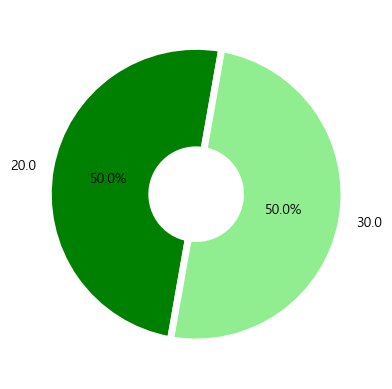

In [ ]:
## 기업규모코드

import matplotlib.pyplot as plt

ratio = [0.5, 0.5]
labels = ['20.0', '30.0']
colors = ['green', 'lightgreen']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

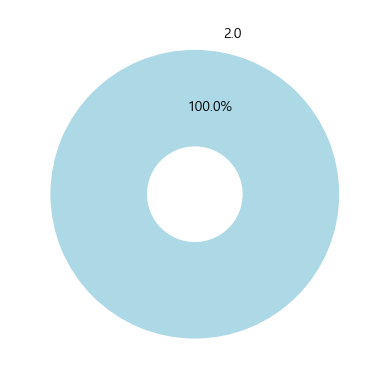

In [ ]:
## 현금흐름스코어

import matplotlib.pyplot as plt

ratio = [1.0]
labels = ['2.0']
colors = ['lightblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

In [ ]:
# 백테스팅 기간 : 2019.04.01 ~ 2020.4.1
start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 1)

kospi_df = fdr.DataReader("KS11", start, end)
kospi_df["KOSPI_수익률"] = kospi_df["Close"]/kospi_df["Close"][0] - 1
kospi_df["KOSPI_수익률"] = kospi_df["KOSPI_수익률"]*100
kospi_df

invest_list = df_pred1signal0_select1.index

df_compare = pd.DataFrame()
  

for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]
    

for i in invest_list:
    df_compare[i] = df_compare[i]/df_compare[i][0] - 1


df_compare["수익률(%)"] = df_compare[invest_list[0]]

for i in invest_list:
    df_compare["수익률(%)"] = df_compare[i] + df_compare["수익률(%)"]
df_compare["수익률(%)"] = df_compare["수익률(%)"] - df_compare[invest_list[0]]
df_compare["수익률(%)"] = df_compare["수익률(%)"]/12
df_compare["수익률(%)"] = df_compare["수익률(%)"]*100

df_plot0 = pd.concat([kospi_df, df_compare],axis=1)
df_plot0.plot(y = ["KOSPI_수익률", "수익률(%)"], figsize = [20,20], grid = True)

NameError: name 'datetime' is not defined

In [ ]:
def get_return_sl(code, short, long):
    
    # 백테스팅 기간 : 2019.04.01 ~ 2020.04.01
    start = datetime.datetime(2019, 4, 1)
    end = datetime.datetime(2020, 4, 1)

    df = fdr.DataReader(code, start, end)
    df = df[['Close']].copy()

    df['ma1'] = df['Close'].rolling(short).mean().shift(1)
    df['ma2'] = df['Close'].rolling(long).mean().shift(1)

    df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

    df.iloc[-1, -1] = 'sell'

    cond1 = ( df['action'] == 'buy') & ( df['action'].shift(1) == 'sell')
    cond2 = ( df['action'] == 'sell') & ( df['action'].shift(1) == 'buy')

    df_buy = df[cond1].reset_index()
    df_buy.columns = ['날짜', '종가(buy)', '이평3일', '이평30일', '결정']

    df_sell = df[cond2].reset_index()
    df_sell.columns = ['날짜', '종가(sell)', '이평3일', '이평30일', '결정']

    df_result = pd.concat([df_buy, df_sell], axis = 1)

    df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)'] 

    df_final = (df_result[['수익률']].cumprod().tail(1) -1)*100

    df_final['단기 이평'] = short
    df_final['장기 이평'] = long

    return df_final

invest_list = df_pred1signal0_select1.index

dfs = list()
for i in invest_list:
    dfs.append(get_return_sl(i, 20 ,60))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/10)
df_result

-6.069125645382071


,수익률,단기 이평,장기 이평
0,-27.313760,20,60
1,-12.522756,20,60
2,66.458073,20,60
3,-8.962691,20,60
4,10.571017,20,60
5,-37.107447,20,60
6,-6.783449,20,60
7,-16.269784,20,60
8,-4.630788,20,60
9,-24.129671,20,60


In [ ]:
invest_list = df_pred1signal0_select1.index
df_compare = pd.DataFrame()
for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]

df_compare["sum"] = df_compare[invest_list[0]]
for i in invest_list:
    df_compare["sum"] = df_compare[i] + df_compare["sum"]
df_compare["sum"] = df_compare["sum"] - df_compare[invest_list[0]]

MDD_list.append(round(DD(df_compare),2))


df_compare["전날대비수익률"] = (df_compare["sum"] - df_compare["sum"].shift(1))/df_compare["sum"]
VOL = np.std(df_compare["전날대비수익률"]) * np.sqrt(len(df_compare["전날대비수익률"]))
SHARP = (-0.06 - 0.0150)/VOL
VOL_list.append(VOL)
SHARP_list.append(SHARP)


print("DD = ", DD(df_compare))
print("VOL = ", VOL)
print("SHARP = ", SHARP)

DD =  34.10650215215123
VOL =  0.31938631814564056
SHARP =  -0.2348253376520653


In [ ]:
df_pred1signal0_select2 = df_pred1signal0.loc[((df_pred1signal0['PEG'] > 0) & (df_pred1signal0['PEG'] < 2)) &
                    (df_pred1signal0['현금흐름스코어'] > 1) & (df_pred1signal0['영업손익'] > 0) \
                    & (df_pred1signal0['매출액순이익률'] > 0)
                    & (df_pred1signal0['기업규모코드'] > 10)
                    & (df_pred1signal0['성장비용비율'] >= 0.02)]
 


df_pred1signal0_select2

,회계년도,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG,성장비용비율
거래소코드,,,,,,,,,,,,,,,,,,
030190,2018,3.580,17.470,30.0,383774178.0,9.98,6.48,14407449.0,48605376.0,2.08,10950.0,나이스평가정보(주),0.299047,2,27.397260,1,0.935661,0.037541
051160,2018,4.700,14.720,20.0,131555043.0,0.74,30.94,4488800.0,1172741.0,9.59,3225.0,(주)지어소프트,1.361293,2,30.232558,1,0.153027,0.034121
080010,2018,1.220,22.175,20.0,53729890.0,11.83,5.16,8454816.0,6828534.0,0.62,7450.0,(주)이상네트웍스,0.557605,2,-4.429530,0,0.676939,0.157358
131290,2018,0.980,10.425,30.0,184431173.0,6.94,-0.71,6359297.0,14834007.0,1.09,6530.0,(주)티에스이,0.123589,2,111.332312,1,0.068868,0.034481
096240,2018,2.805,25.540,30.0,152690562.0,6.66,3.61,17105848.0,15774065.0,1.77,18450.0,(주)크레버스,0.395307,2,1.626016,0,0.513883,0.112030
093320,2018,1.805,9.965,30.0,56304485.0,22.14,19.07,9334004.0,13164858.0,0.87,24000.0,(주)케이아이엔엑스,0.071759,2,51.875000,1,0.250156,0.165777
143240,2018,2.870,14.365,30.0,86145918.0,19.35,5.90,4798732.0,18875824.0,1.04,18150.0,(주)사람인에이치알,0.143925,2,70.798898,1,0.656578,0.055705
035610,2018,1.105,15.140,20.0,84440587.0,11.92,13.94,8078048.0,15327893.0,0.49,4470.0,(주)솔본,0.026182,2,-9.619687,0,0.147849,0.095665
085910,2018,1.080,14.965,20.0,45195339.0,7.03,3.96,1321924.0,4693123.0,1.00,4250.0,(주)네오티스,0.856175,2,-10.588235,0,0.393327,0.029249


In [ ]:
df_pred1signal0_select2.index

Index(['030190', '051160', '080010', '131290', '096240', '093320', '143240',
       '035610', '085910', '130580', '060540', '052860'],
      dtype='object', name='거래소코드')

<AxesSubplot: xlabel='Date'>

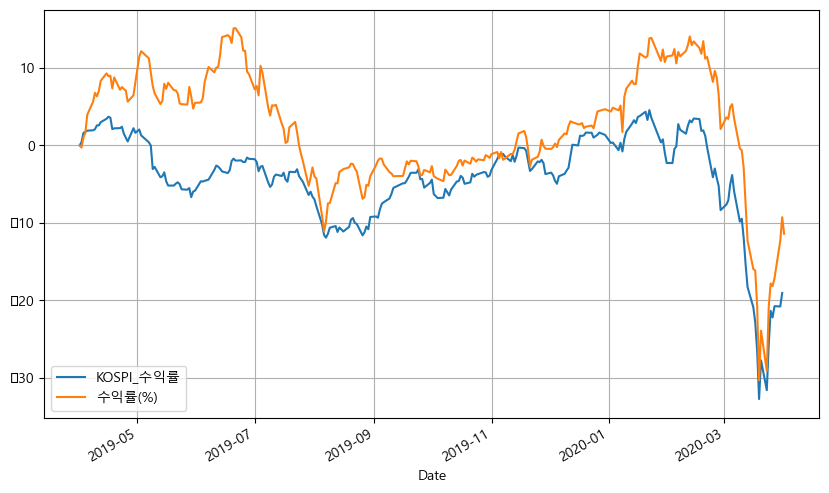

In [ ]:
# 백테스팅 기간 : 2019.04.01 ~ 2020.4.1
start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 1)

kospi_df = fdr.DataReader("KS11", start, end)
kospi_df["KOSPI_수익률"] = kospi_df["Close"]/kospi_df["Close"][0] - 1
kospi_df["KOSPI_수익률"] = kospi_df["KOSPI_수익률"]*100
kospi_df

invest_list = ['030190', '051160', '080010', '131290', '096240', '093320', '143240',
       '035610', '085910', '130580', '060540', '052860']

df_compare = pd.DataFrame()
  

for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]
    

for i in invest_list:
    df_compare[i] = df_compare[i]/df_compare[i][0] - 1


df_compare["수익률(%)"] = df_compare[invest_list[0]]

for i in invest_list:
    df_compare["수익률(%)"] = df_compare[i] + df_compare["수익률(%)"]
df_compare["수익률(%)"] = df_compare["수익률(%)"] - df_compare[invest_list[0]]
df_compare["수익률(%)"] = df_compare["수익률(%)"]/12
df_compare["수익률(%)"] = df_compare["수익률(%)"]*100

df_plot0 = pd.concat([kospi_df, df_compare],axis=1)
df_plot0.plot(y = ["KOSPI_수익률", "수익률(%)"], figsize = [10,6], grid = True)

In [ ]:
df_pred1signal0_select3 = df_pred1signal0.loc[((df_pred1signal0['PEG'] > 0) & (df_pred1signal0['PEG'] <= 1.5)) &
                    (df_pred1signal0['현금흐름스코어'] > 1) & (df_pred1signal0['영업손익'] > 0) \
                    & (df_pred1signal0['매출액순이익률'] > 0)
                    & (df_pred1signal0['매출액증가율'] >= -30)
                    & (df_pred1signal0['기업규모코드'] > 10) 
                    & (df_pred1signal0['부채자본비율'] < 4)
                    & (df_pred1signal0['성장비용비율'] >= 0.02)]
 


df_pred1signal0_select3

,회계년도,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG,성장비용비율
거래소코드,,,,,,,,,,,,,,,,,,
030190,2018,3.580,17.470,30.0,383774178.0,9.98,6.48,14407449.0,48605376.0,2.08,10950.0,나이스평가정보(주),0.299047,2,27.397260,1,0.935661,0.037541
051160,2018,4.700,14.720,20.0,131555043.0,0.74,30.94,4488800.0,1172741.0,9.59,3225.0,(주)지어소프트,1.361293,2,30.232558,1,0.153027,0.034121
080010,2018,1.220,22.175,20.0,53729890.0,11.83,5.16,8454816.0,6828534.0,0.62,7450.0,(주)이상네트웍스,0.557605,2,-4.429530,0,0.676939,0.157358
131290,2018,0.980,10.425,30.0,184431173.0,6.94,-0.71,6359297.0,14834007.0,1.09,6530.0,(주)티에스이,0.123589,2,111.332312,1,0.068868,0.034481
096240,2018,2.805,25.540,30.0,152690562.0,6.66,3.61,17105848.0,15774065.0,1.77,18450.0,(주)크레버스,0.395307,2,1.626016,0,0.513883,0.112030
093320,2018,1.805,9.965,30.0,56304485.0,22.14,19.07,9334004.0,13164858.0,0.87,24000.0,(주)케이아이엔엑스,0.071759,2,51.875000,1,0.250156,0.165777
143240,2018,2.870,14.365,30.0,86145918.0,19.35,5.90,4798732.0,18875824.0,1.04,18150.0,(주)사람인에이치알,0.143925,2,70.798898,1,0.656578,0.055705
035610,2018,1.105,15.140,20.0,84440587.0,11.92,13.94,8078048.0,15327893.0,0.49,4470.0,(주)솔본,0.026182,2,-9.619687,0,0.147849,0.095665
085910,2018,1.080,14.965,20.0,45195339.0,7.03,3.96,1321924.0,4693123.0,1.00,4250.0,(주)네오티스,0.856175,2,-10.588235,0,0.393327,0.029249


In [ ]:
df_pred1signal0_select3.index

Index(['030190', '051160', '080010', '131290', '096240', '093320', '143240',
       '035610', '085910', '130580'],
      dtype='object', name='거래소코드')

<AxesSubplot: xlabel='Date'>

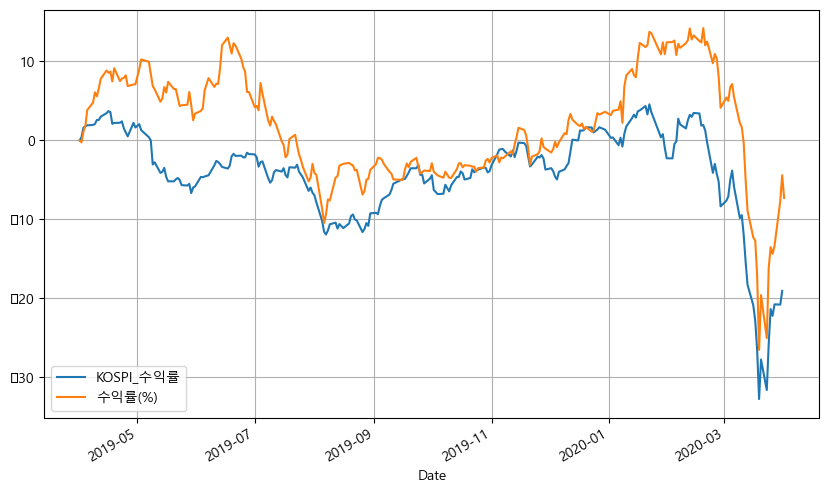

In [ ]:
# 백테스팅 기간 : 2019.04.01 ~ 2020.4.1
start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 1)

kospi_df = fdr.DataReader("KS11", start, end)
kospi_df["KOSPI_수익률"] = kospi_df["Close"]/kospi_df["Close"][0] - 1
kospi_df["KOSPI_수익률"] = kospi_df["KOSPI_수익률"]*100
kospi_df

invest_list = ['030190', '051160', '080010', '131290', '096240', '093320', '143240',
       '035610', '085910', '130580']

df_compare = pd.DataFrame()
  

for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]
    

for i in invest_list:
    df_compare[i] = df_compare[i]/df_compare[i][0] - 1


df_compare["수익률(%)"] = df_compare[invest_list[0]]

for i in invest_list:
    df_compare["수익률(%)"] = df_compare[i] + df_compare["수익률(%)"]
df_compare["수익률(%)"] = df_compare["수익률(%)"] - df_compare[invest_list[0]]
df_compare["수익률(%)"] = df_compare["수익률(%)"]/10
df_compare["수익률(%)"] = df_compare["수익률(%)"]*100

df_plot0 = pd.concat([kospi_df, df_compare],axis=1)
df_plot0.plot(y = ["KOSPI_수익률", "수익률(%)"], figsize = [10,6], grid = True)

In [ ]:
A = ['001940',
 '024120',
 '064960',
 '003570',
 '071970',
 '024910',
 '002140',
 '010130',
 '010690',
 '019490',
 '004590',
 '006200',
 '017960',
 '014130',
 '079960',
 '030720',
 '000210',
 '104460',
 '078600',
 '014280',
 '005750',
 '051490',
 '030190',
 '006580',
 '003220',
 '106080',
 '001630',
 '009810',
 '019540',
 '051160',
 '088790',
 '069330',
 '039020',
 '067920',
 '041520',
 '054210',
 '065440',
 '080010',
 '005950',
 '102710',
 '123570',
 '083470',
 '017940',
 '131290',
 '019180',
 '049120',
 '038950',
 '065690',
 '027710',
 '041020',
 '005670',
 '103140',
 '096240',
 '029460',
 '009070',
 '093320',
 '105330',
 '005990',
 '078650',
 '056360',
 '043590',
 '004100',
 '023410',
 '044060',
 '033050',
 '032540',
 '022220',
 '009180',
 '002220',
 '012330',
 '000850',
 '128940',
 '002200',
 '015760',
 '039740',
 '009540',
 '043260',
 '091580',
 '065710',
 '045300',
 '036630',
 '036830',
 '002870',
 '107590',
 '083650',
 '003720',
 '010960',
 '010280',
 '038110',
 '101400',
 '046940',
 '020560',
 '001540',
 '102120',
 '054930',
 '068290',
 '023600',
 '143240',
 '086670',
 '032280',
 '019770',
 '042940',
 '032750',
 '038340',
 '006920',
 '038460',
 '100220',
 '008470',
 '002760',
 '046310',
 '018680',
 '115570',
 '065770',
 '004920',
 '049960',
 '015540',
 '138070',
 '011560',
 '053060',
 '037350',
 '002820',
 '011370',
 '086980',
 '035610',
 '049180',
 '012600',
 '053450',
 '090350',
 '085910',
 '008350',
 '065560',
 '086900',
 '004780',
 '130580',
 '012320',
 '011420',
 '002710',
 '100840',
 '009160',
 '023150',
 '097230',
 '035290',
 '053270',
 '043360',
 '066900',
 '109740',
 '012030',
 '012700',
 '067280',
 '060240',
 '075970',
 '140520',
 '069620',
 '007590',
 '013120',
 '060380',
 '088130',
 '067770',
 '031860',
 '048830']

<AxesSubplot: xlabel='Date'>

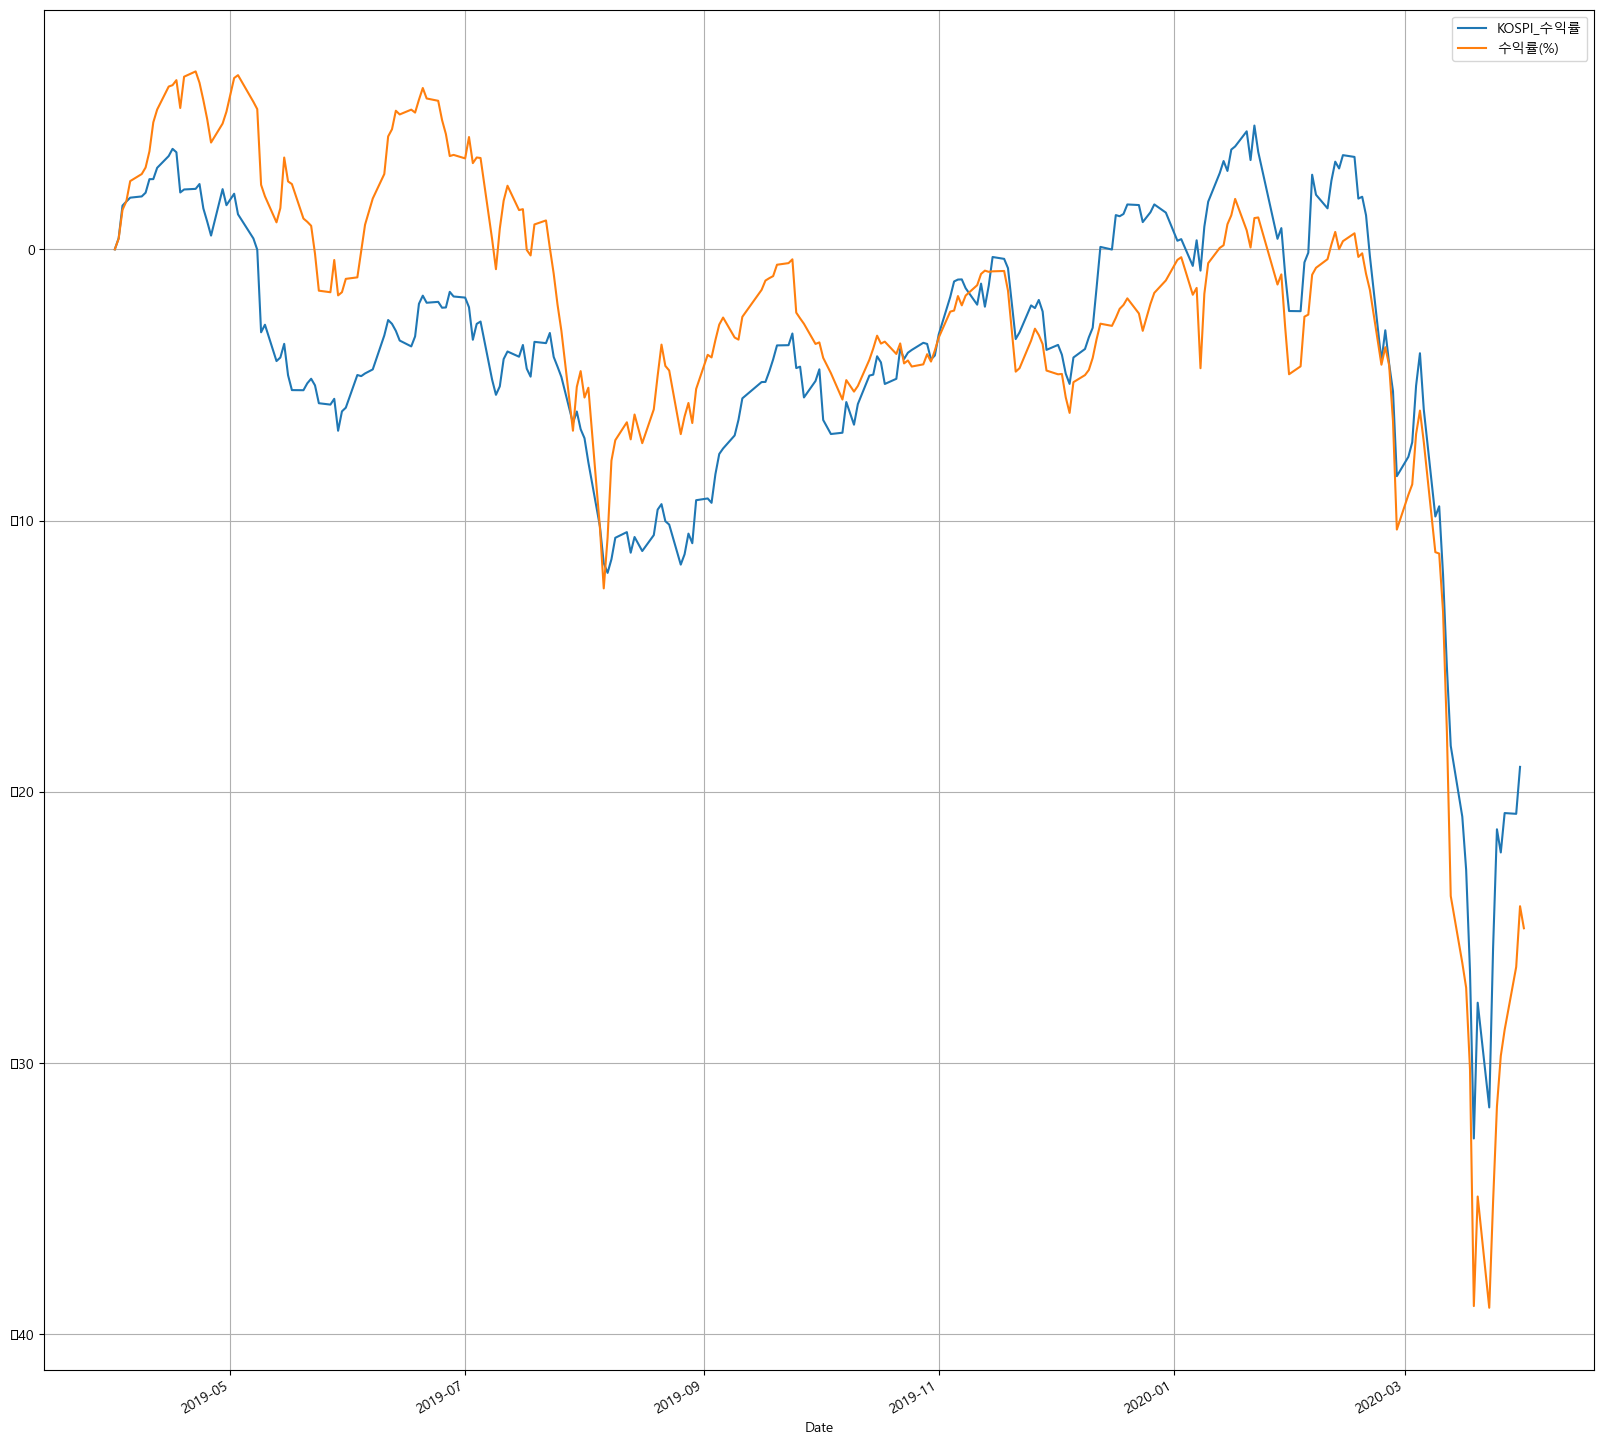

In [ ]:
# 백테스팅 기간 : 2019.04.01 ~ 2020.4.1
## 165개 돌리기
start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 1)

kospi_df = fdr.DataReader("KS11", start, end)
kospi_df["KOSPI_수익률"] = kospi_df["Close"]/kospi_df["Close"][0] - 1
kospi_df["KOSPI_수익률"] = kospi_df["KOSPI_수익률"]*100
kospi_df

invest_list = ['001940',
 '024120',
 '064960',
 '003570',
 '071970',
 '024910',
 '002140',
 '010130',
 '010690',
 '019490',
 '004590',
 '006200',
 '017960',
 '014130',
 '079960',
 '030720',
 '000210',
 '104460',
 '078600',
 '014280',
 '005750',
 '051490',
 '030190',
 '006580',
 '003220',
 '106080',
 '001630',
 '009810',
 '019540',
 '051160',
 '088790',
 '069330',
 '039020',
 '067920',
 '041520',
 '054210',
 '065440',
 '080010',
 '005950',
 '102710',
 '123570',
 '083470',
 '017940',
 '131290',
 '019180',
 '049120',
 '038950',
 '065690',
 '027710',
 '041020',
 '005670',
 '103140',
 '096240',
 '029460',
 '009070',
 '093320',
 '105330',
 '005990',
 '078650',
 '056360',
 '043590',
 '004100',
 '023410',
 '044060',
 '033050',
 '032540',
 '022220',
 '009180',
 '002220',
 '012330',
 '000850',
 '128940',
 '002200',
 '015760',
 '039740',
 '009540',
 '043260',
 '091580',
 '065710',
 '045300',
 '036630',
 '036830',
 '002870',
 '107590',
 '083650',
 '003720',
 '010960',
 '010280',
 '038110',
 '101400',
 '046940',
 '020560',
 '001540',
 '102120',
 '054930',
 '068290',
 '023600',
 '143240',
 '086670',
 '032280',
 '019770',
 '042940',
 '032750',
 '038340',
 '006920',
 '038460',
 '100220',
 '008470',
 '002760',
 '046310',
 '018680',
 '115570',
 '065770',
 '004920',
 '049960',
 '015540',
 '138070',
 '011560',
 '053060',
 '037350',
 '002820',
 '011370',
 '086980',
 '035610',
 '049180',
 '012600',
 '053450',
 '090350',
 '085910',
 '008350',
 '065560',
 '086900',
 '004780',
 '130580',
 '012320',
 '011420',
 '002710',
 '100840',
 '009160',
 '023150',
 '097230',
 '035290',
 '053270',
 '043360',
 '066900',
 '109740',
 '012030',
 '012700',
 '067280',
 '060240',
 '075970',
 '140520',
 '069620',
 '007590',
 '013120',
 '060380',
 '088130',
 '067770',
 '031860',
 '048830']

df_compare = pd.DataFrame()
  

for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]
    

for i in invest_list:
    df_compare[i] = df_compare[i]/df_compare[i][0] - 1


df_compare["수익률(%)"] = df_compare[invest_list[0]]

for i in invest_list:
    df_compare["수익률(%)"] = df_compare[i] + df_compare["수익률(%)"]
df_compare["수익률(%)"] = df_compare["수익률(%)"] - df_compare[invest_list[0]]
df_compare["수익률(%)"] = df_compare["수익률(%)"]/165
df_compare["수익률(%)"] = df_compare["수익률(%)"]*100

df_plot0 = pd.concat([kospi_df, df_compare],axis=1)
df_plot0.plot(y = ["KOSPI_수익률", "수익률(%)"], figsize = [20,20], grid = True)

In [ ]:
def get_return_sl(code, short, long):
    
    # 백테스팅 기간 : 2019.04.01 ~ 2020.04.01
    start = datetime.datetime(2019, 4, 1)
    end = datetime.datetime(2020, 4, 1)

    df = fdr.DataReader(code, start, end)
    df = df[['Close']].copy()

    df['ma1'] = df['Close'].rolling(short).mean().shift(1)
    df['ma2'] = df['Close'].rolling(long).mean().shift(1)

    df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

    df.iloc[-1, -1] = 'sell'

    cond1 = ( df['action'] == 'buy') & ( df['action'].shift(1) == 'sell')
    cond2 = ( df['action'] == 'sell') & ( df['action'].shift(1) == 'buy')

    df_buy = df[cond1].reset_index()
    df_buy.columns = ['날짜', '종가(buy)', '이평3일', '이평30일', '결정']

    df_sell = df[cond2].reset_index()
    df_sell.columns = ['날짜', '종가(sell)', '이평3일', '이평30일', '결정']

    df_result = pd.concat([df_buy, df_sell], axis = 1)

    df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)'] 

    df_final = (df_result[['수익률']].cumprod().tail(1) -1)*100

    df_final['단기 이평'] = short
    df_final['장기 이평'] = long

    return df_final

invest_list = A

dfs = list()
for i in invest_list:
    dfs.append(get_return_sl(i, 20 ,60))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/165)
df_result

-15.028837899758004


,수익률,단기 이평,장기 이평
0,-3.572861,20,60
1,4.537522,20,60
2,-14.511888,20,60
3,-3.016591,20,60
4,-12.575758,20,60
...,...,...,...
151,-4.775544,20,60
152,-18.860583,20,60
153,-17.775818,20,60
154,-26.268707,20,60


In [ ]:
invest_list = A
df_compare = pd.DataFrame()
for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]

df_compare["sum"] = df_compare[invest_list[0]]
for i in invest_list:
    df_compare["sum"] = df_compare[i] + df_compare["sum"]
df_compare["sum"] = df_compare["sum"] - df_compare[invest_list[0]]

MDD_list.append(round(DD(df_compare),2))


df_compare["전날대비수익률"] = (df_compare["sum"] - df_compare["sum"].shift(1))/df_compare["sum"]
VOL = np.std(df_compare["전날대비수익률"]) * np.sqrt(len(df_compare["전날대비수익률"]))
SHARP = (-0.15 - 0.0150)/VOL
VOL_list.append(VOL)
SHARP_list.append(SHARP)


print("DD = ", DD(df_compare))
print("VOL = ", VOL)
print("SHARP = ", SHARP)

NameError: name 'MDD_list' is not defined

아래 조건에 의해 추출 후 상위 10개 종목으로 포트폴리오 구성하기

In [ ]:
MDD_list = []
def DD(data):
    data["전고점"] = data["sum"].cummax()
    data["DD"] = (1-data["sum"]/data["전고점"])*100
    MDD = data["DD"].max()
    return MDD

VOL_list = []
SHARP_list = []

def replace_0(x):
    if x > 0 :
        return 0
    else:
        return x

In [ ]:
## 포트폴리오 5 (PEG, 부채자본비율) 상위 10개

df_pred1signal0_select5 = df_pred1signal0.loc[((df_pred1signal0['PEG'] > 0) & (df_pred1signal0['PEG'] <= 1.5)) &
                    (df_pred1signal0['부채자본비율'] < 4)]
 


df_pred1signal0_select5.sort_values('PEG').head(10)

,회계년도,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG,성장비용비율
거래소코드,,,,,,,,,,,,,,,,,,
029460,2018,0.870,1.350,30.0,5.260710e+08,33.52,-8.18,0.0,76131128.0,1.59,11750.0,(주)케이씨,0.239563,2,58.723404,1,0.009727,0.000000
002200,2018,0.385,5.085,30.0,2.802013e+08,6.17,14.66,0.0,23069423.0,1.25,19450.0,한국수출포장공업(주),0.288287,2,1.799486,0,0.024074,0.000000
045300,2018,1.120,10.865,20.0,3.951695e+07,13.72,3.56,22679.0,7192123.0,0.89,4050.0,성우테크론(주),0.462748,2,4.320988,0,0.033577,0.000574
010280,2018,1.100,2.610,30.0,1.233163e+08,14.35,-15.58,1898955.0,2902178.0,3.49,1370.0,쌍용정보통신(주),0.780697,2,33.941606,1,0.036560,0.015399
039020,2018,0.365,3.095,30.0,3.077159e+08,4.39,48.66,1484334.0,13146175.0,1.67,2820.0,(주)이건홀딩스,0.207999,2,-6.560284,0,0.053094,0.004824
009160,2018,0.260,1.685,30.0,3.061508e+08,22.60,32.74,0.0,10190572.0,0.91,2440.0,(주)SIMPAC,0.528349,1,20.696721,1,0.059867,0.000000
000210,2018,0.680,4.790,10.0,1.098449e+10,6.17,-10.95,0.0,845358146.0,1.87,102500.0,디엘(주),0.973394,2,-11.707317,0,0.061572,0.000000
131290,2018,0.980,10.425,30.0,1.844312e+08,6.94,-0.71,6359297.0,14834007.0,1.09,6530.0,(주)티에스이,0.123589,2,111.332312,1,0.068868,0.034481
006580,2018,0.715,2.515,30.0,2.817715e+08,10.83,7.17,0.0,41611081.0,2.58,3125.0,대양제지공업(주),0.331047,2,4.000000,0,0.082285,0.000000


In [ ]:
df_pred1signal0_select5.sort_values('PEG').head(10).to_csv('./PEG기준10개port.csv')

In [ ]:
df_forinsight=df_pred1signal0_select5.sort_values('PEG').head(10)

<AxesSubplot: >

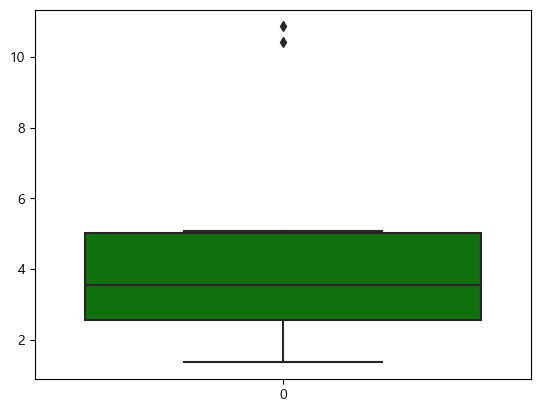

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df_forinsight["PER"], 

             color="green")

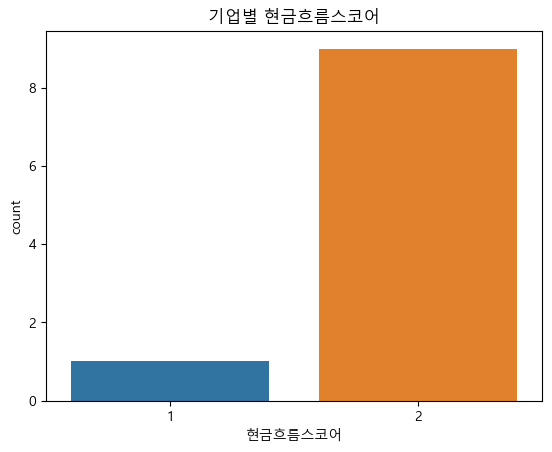

In [ ]:
sns.countplot(x="현금흐름스코어", data=df_forinsight)
plt.title("기업별 현금흐름스코어")
plt.show()

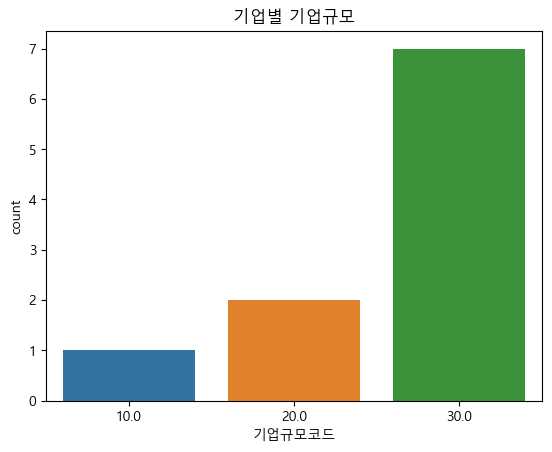

In [ ]:
sns.countplot(x="기업규모코드", data=df_forinsight)
plt.title("기업별 기업규모")
plt.show()

<AxesSubplot: >

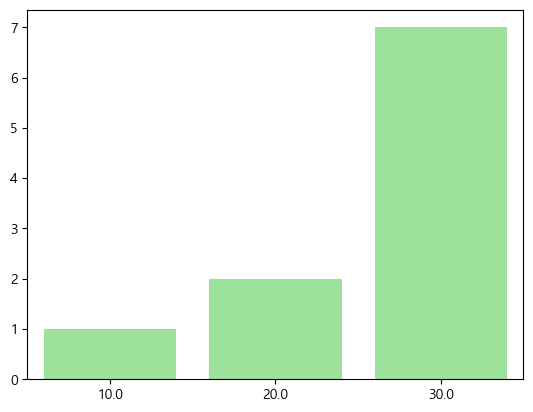

In [ ]:
values = np.array(df_forinsight['기업규모코드'].value_counts())   
idx = np.array(df_forinsight['기업규모코드'].value_counts().index) 
palette = ['lightgreen' if (x == max(values)) else 'lightgreen' for x in values]
sns.barplot(x=idx, y=values, palette=palette)

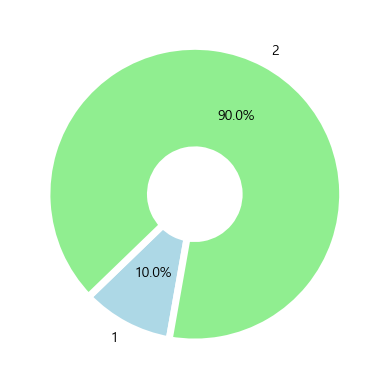

In [ ]:
## 현금흐름스코어

import matplotlib.pyplot as plt

ratio = [0.1, 0.9]
labels = ['1', '2']
colors = ['lightblue', 'lightgreen']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

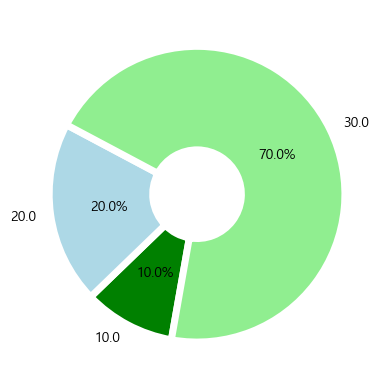

In [ ]:
## 기업규모코드

import matplotlib.pyplot as plt

ratio = [0.1, 0.2, 0.7]
labels = ['10.0', '20.0', '30.0']
colors = ['green', 'lightblue', 'lightgreen']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

In [ ]:
def doughnut_plot_sorted_feature_importances(model, feature_names, file_name = "default"):
  n_features = len(model.feature_importances_) 
  importances = model.feature_importances_
  sorted_index = np.argsort(importances)[::-1]
  pie_labels = np.array(feature_names)[sorted_index]
  sns.set_palette("nipy_spectral_r", n_colors = n_features) # "gist_ncar"
  fig, ax = plt.subplots(figsize = (16, 17))
  ax.set_title("Model: " + str(model).partition("(")[0] + "\nSorted feature importances", fontsize = 20)
  ax.pie(importances[sorted_index], labeldistance = 1.04, pctdistance = 0.65,
         labels = format_labels(importances[sorted_index], pie_labels),
         startangle = 90, counterclock = False, autopct = format_autopct, # "%1.2f%%"
         wedgeprops = dict(linewidth = 3, edgecolor = "white"), 
         textprops = dict(color = "black", size = 16)) # weight = "bold",
         # ax.legend(pie_labels, title = "Features", loc = "center", title_fo ntsize = 14,
         #           facecolor = "lightcyan", fontsize = 12) 
         # Center circle
  center_circle = plt.Circle((0, 0), 0.75, fc = "white") 
  fig = plt.gcf()
  fig.gca().add_artist(center_circle) 
         # Create legend
  default_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"] 
  patches = []# primary_colors
  for color, label in zip(default_colors, pie_labels):
    patch = Patch(color = color, label = label) 
    patches.append(patch)
  ax.legend(handles = patches, title = "Features", loc = "center", facecolor = "lightcyan",
            title_fontsize = 14, fontsize = 12)
          # Equal aspect, then show the whole plot 
  ax.axis("equal")
  plt.tight_layout()
  restore_matplotlib_defaults()
  plt.savefig("boston_" + file_name + "_sorted_feature_importances_doughnut.png")

In [ ]:
doughnut_plot_sorted_feature_importances(pie, )

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df_forinsight["매출액순이익률"], 

             color="green")

NameError: name 'df_forinsight' is not defined

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(30,30)) 

sns.boxplot(df_forinsight["PBR"], ax=ax[0,0])
sns.boxplot(df_forinsight["PER"], ax=ax[0,1])
sns.distplot(df_forinsight["PEG"], ax=ax[0,2])
sns.distplot(df_forinsight["매출액순이익률"], ax=ax[0,4])
sns.distplot(df_forinsight["영업손익"], ax=ax[1,0])
sns.distplot(df_forinsight["성장비용"], ax=ax[1,1])
sns.distplot(df_pred1signal1["현금흐름스코어"], ax=ax[1,2])
sns.distplot(df_pred1signal1["자기자본회전률"], ax=ax[1,3])
sns.distplot(df_pred1signal1["부채자본비율"], ax=ax[1,4])

In [ ]:
df_pred1signal0_select5.sort_values('PEG').head(10).index

Index(['029460', '002200', '045300', '010280', '039020', '009160', '000210',
       '131290', '006580', '104460'],
      dtype='object', name='거래소코드')

<AxesSubplot: xlabel='Date'>

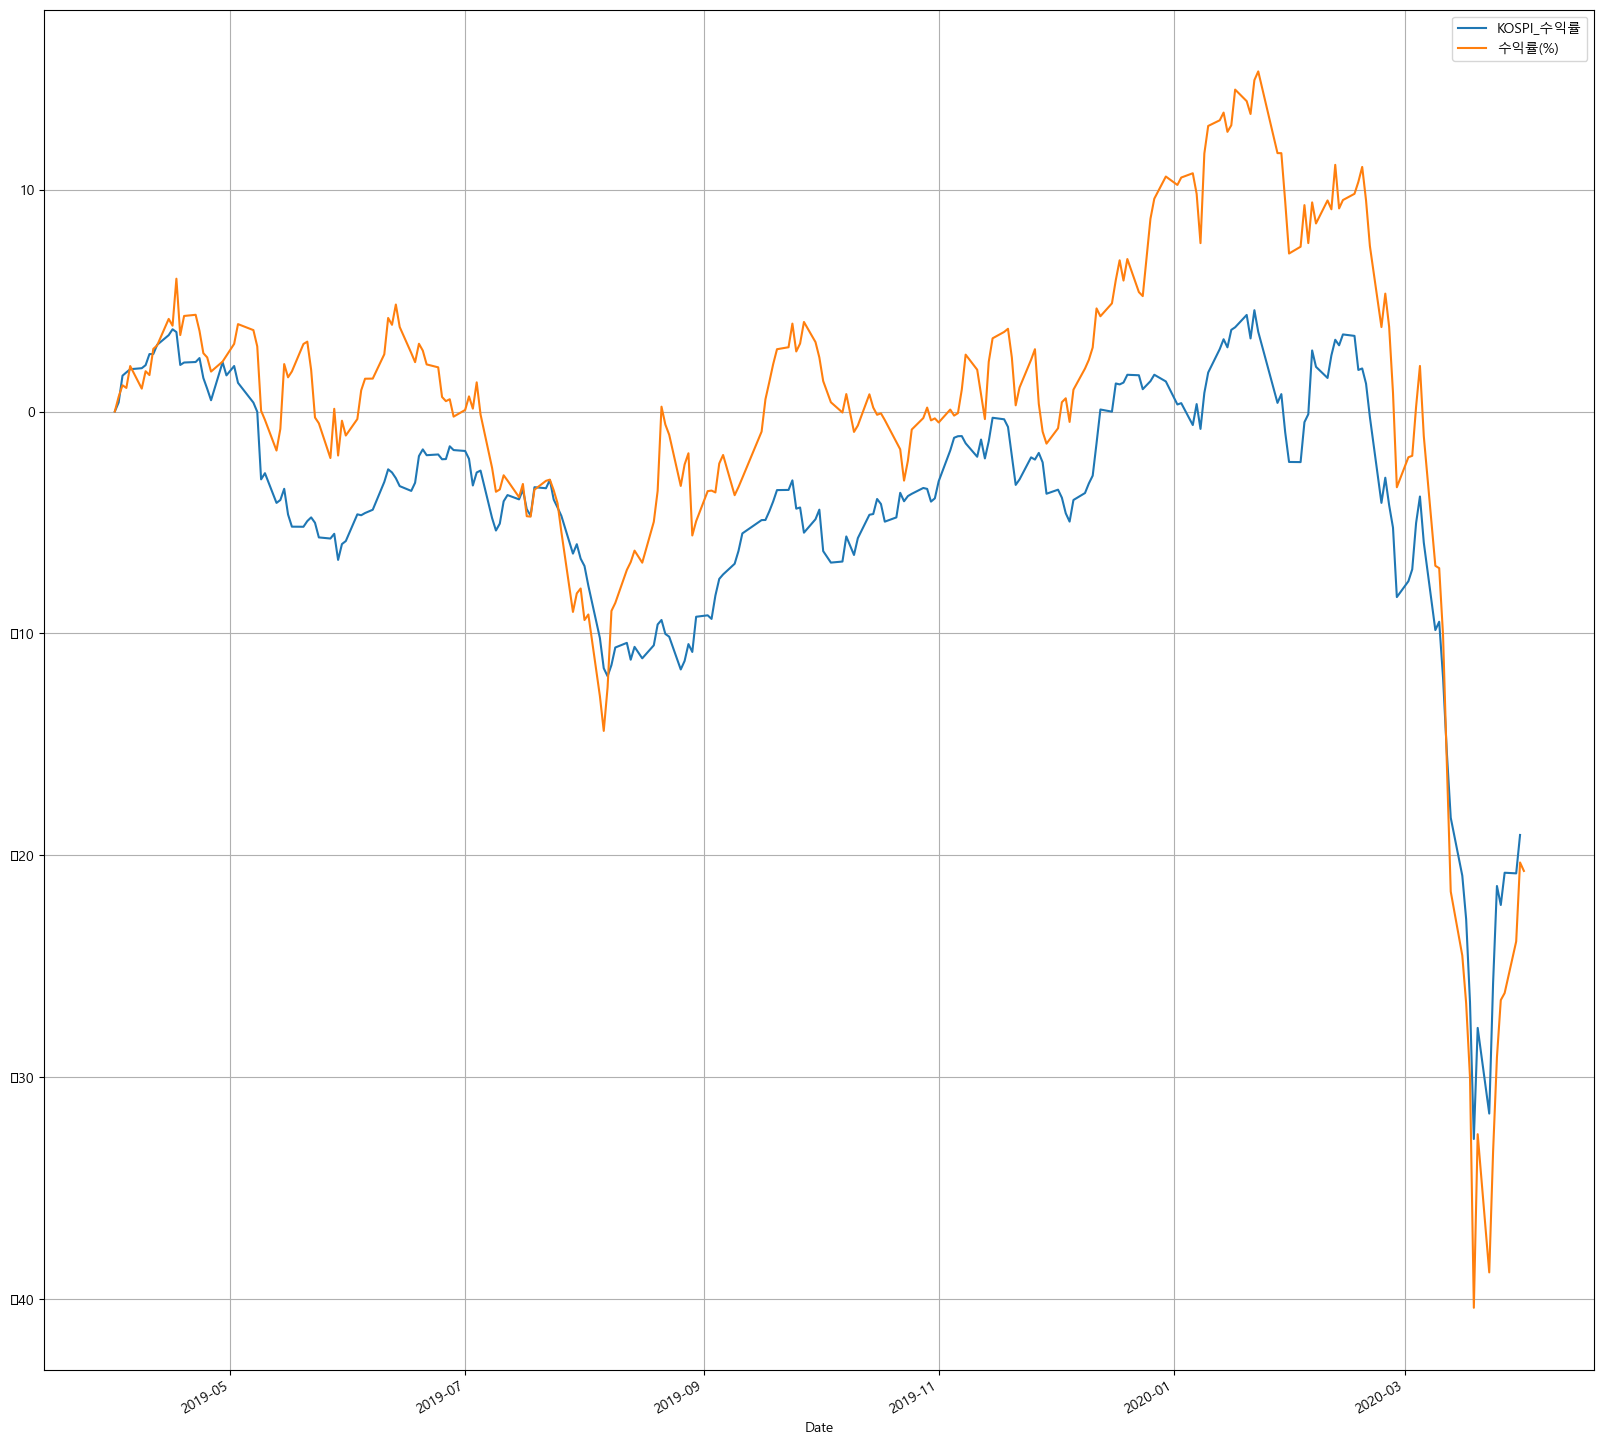

In [ ]:
# 백테스팅 기간 : 2019.04.01 ~ 2020.4.1
## 10개 돌리기
start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 1)

kospi_df = fdr.DataReader("KS11", start, end)
kospi_df["KOSPI_수익률"] = kospi_df["Close"]/kospi_df["Close"][0] - 1
kospi_df["KOSPI_수익률"] = kospi_df["KOSPI_수익률"]*100
kospi_df

invest_list = df_pred1signal0_select5.sort_values('PEG').head(10).index

df_compare = pd.DataFrame()
  

for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]
    

for i in invest_list:
    df_compare[i] = df_compare[i]/df_compare[i][0] - 1


df_compare["수익률(%)"] = df_compare[invest_list[0]]

for i in invest_list:
    df_compare["수익률(%)"] = df_compare[i] + df_compare["수익률(%)"]
df_compare["수익률(%)"] = df_compare["수익률(%)"] - df_compare[invest_list[0]]
df_compare["수익률(%)"] = df_compare["수익률(%)"]/10
df_compare["수익률(%)"] = df_compare["수익률(%)"]*100

df_plot0 = pd.concat([kospi_df, df_compare],axis=1)
df_plot0.plot(y = ["KOSPI_수익률", "수익률(%)"], figsize = [20,20], grid = True)

In [ ]:
def get_return_sl(code, short, long):
    
    # 백테스팅 기간 : 2019.04.01 ~ 2020.04.01
    start = datetime.datetime(2019, 4, 1)
    end = datetime.datetime(2020, 4, 1)

    df = fdr.DataReader(code, start, end)
    df = df[['Close']].copy()

    df['ma1'] = df['Close'].rolling(short).mean().shift(1)
    df['ma2'] = df['Close'].rolling(long).mean().shift(1)

    df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

    df.iloc[-1, -1] = 'sell'

    cond1 = ( df['action'] == 'buy') & ( df['action'].shift(1) == 'sell')
    cond2 = ( df['action'] == 'sell') & ( df['action'].shift(1) == 'buy')

    df_buy = df[cond1].reset_index()
    df_buy.columns = ['날짜', '종가(buy)', '이평3일', '이평30일', '결정']

    df_sell = df[cond2].reset_index()
    df_sell.columns = ['날짜', '종가(sell)', '이평3일', '이평30일', '결정']

    df_result = pd.concat([df_buy, df_sell], axis = 1)

    df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)'] 

    df_final = (df_result[['수익률']].cumprod().tail(1) -1)*100

    df_final['단기 이평'] = short
    df_final['장기 이평'] = long

    return df_final

invest_list = df_pred1signal0_select5.sort_values('PEG').head(10).index

dfs = list()
for i in invest_list:
    dfs.append(get_return_sl(i, 20 ,60))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/10)
df_result

-4.920248325398054


,수익률,단기 이평,장기 이평
0,-9.918352,20,60
1,-12.997831,20,60
2,-8.181075,20,60
3,-36.203418,20,60
4,-2.527076,20,60
5,-27.278048,20,60
6,-10.593940,20,60
7,66.458073,20,60
8,-24.737132,20,60
9,16.776316,20,60


In [ ]:
invest_list = df_pred1signal0_select5.sort_values('PEG').head(10).index
df_compare = pd.DataFrame()
for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]

df_compare["sum"] = df_compare[invest_list[0]]
for i in invest_list:
    df_compare["sum"] = df_compare[i] + df_compare["sum"]
df_compare["sum"] = df_compare["sum"] - df_compare[invest_list[0]]

MDD_list.append(round(DD(df_compare),2))


df_compare["전날대비수익률"] = (df_compare["sum"] - df_compare["sum"].shift(1))/df_compare["sum"]
VOL = np.std(df_compare["전날대비수익률"]) * np.sqrt(len(df_compare["전날대비수익률"]))
SHARP = (-0.0492 - 0.0150)/VOL
VOL_list.append(VOL)
SHARP_list.append(SHARP)


print("DD = ", DD(df_compare))
print("VOL = ", VOL)
print("SHARP = ", SHARP)

DD =  50.69596492314273
VOL =  0.35823460077889935
SHARP =  -0.17921216951241384


In [ ]:
## 포트폴리오 6 (PEG, 기업규모코드) 상위 10개

df_pred1signal0_select6 = df_pred1signal0.loc[((df_pred1signal0['PEG'] > 0) & (df_pred1signal0['PEG'] <= 1.5)) 
                    & (df_pred1signal0['기업규모코드'] == 20.0)]
 


df_pred1signal0_select6.sort_values('PEG').head(10)

,회계년도,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG,성장비용비율
거래소코드,,,,,,,,,,,,,,,,,,
045300,2018,1.120,10.865,20.0,39516946.0,13.72,3.56,22679.0,7192123.0,0.89,4050.0,성우테크론(주),0.462748,2,4.320988,0,0.033577,0.000574
104460,2018,0.910,3.975,20.0,112079200.0,8.93,17.47,1773611.0,13388572.0,2.23,4925.0,디와이피엔에프(주),1.650048,2,139.593909,1,0.089881,0.015825
067920,2018,1.155,5.850,20.0,64678925.0,13.64,7.63,0.0,2979122.0,1.44,4525.0,(주)이글루코퍼레이션,0.157593,2,-3.314917,0,0.094994,0.000000
035610,2018,1.105,15.140,20.0,84440587.0,11.92,13.94,8078048.0,15327893.0,0.49,4470.0,(주)솔본,0.026182,2,-9.619687,0,0.147849,0.095665
042940,2018,1.550,6.935,20.0,31021854.0,31.10,130.55,0.0,1838309.0,0.87,2070.0,(주)상지카일룸,1.766049,0,-18.357488,0,0.149496,0.000000
051160,2018,4.700,14.720,20.0,131555043.0,0.74,30.94,4488800.0,1172741.0,9.59,3225.0,(주)지어소프트,1.361293,2,30.232558,1,0.153027,0.034121
002870,2018,0.890,5.380,20.0,154107822.0,5.62,6.81,1448193.0,12159066.0,3.20,1305.0,신풍,2.165210,1,14.559387,1,0.197882,0.009397
091580,2018,2.565,19.220,20.0,150148161.0,5.59,50.41,0.0,15714014.0,3.14,12550.0,상신이디피(주),1.137878,2,-34.262948,0,0.245650,0.000000
086670,2018,1.180,10.965,20.0,76878609.0,9.02,20.80,3988187.0,8207253.0,1.24,7360.0,(주)비엠티,0.654150,0,-7.880435,0,0.287419,0.051876


<AxesSubplot: xlabel='Date'>

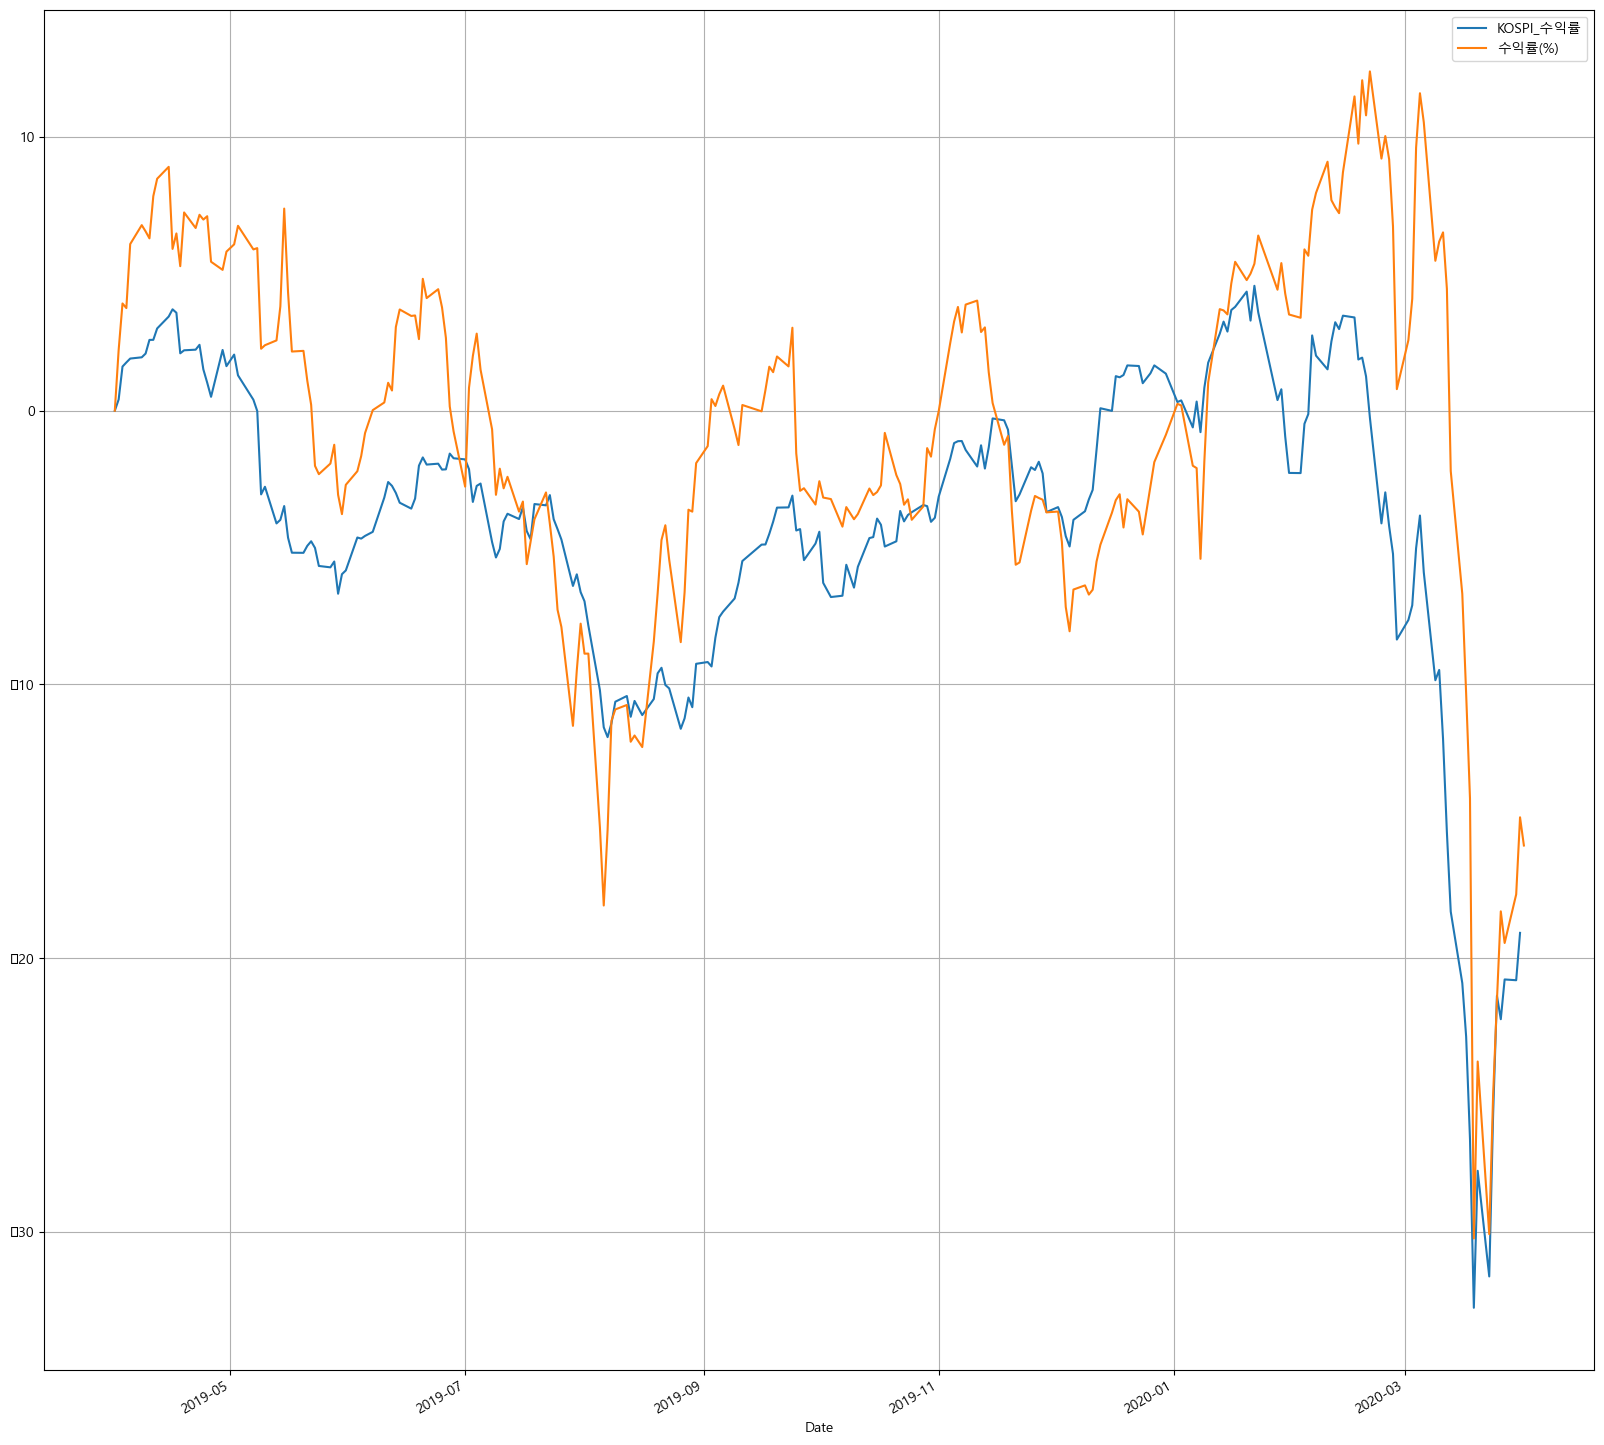

In [ ]:
# 백테스팅 기간 : 2019.04.01 ~ 2020.4.1
## 10개 돌리기
start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 1)

kospi_df = fdr.DataReader("KS11", start, end)
kospi_df["KOSPI_수익률"] = kospi_df["Close"]/kospi_df["Close"][0] - 1
kospi_df["KOSPI_수익률"] = kospi_df["KOSPI_수익률"]*100
kospi_df

invest_list = df_pred1signal0_select6.sort_values('PEG').head(10).index

df_compare = pd.DataFrame()
  

for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]
    

for i in invest_list:
    df_compare[i] = df_compare[i]/df_compare[i][0] - 1


df_compare["수익률(%)"] = df_compare[invest_list[0]]

for i in invest_list:
    df_compare["수익률(%)"] = df_compare[i] + df_compare["수익률(%)"]
df_compare["수익률(%)"] = df_compare["수익률(%)"] - df_compare[invest_list[0]]
df_compare["수익률(%)"] = df_compare["수익률(%)"]/10
df_compare["수익률(%)"] = df_compare["수익률(%)"]*100

df_plot0 = pd.concat([kospi_df, df_compare],axis=1)
df_plot0.plot(y = ["KOSPI_수익률", "수익률(%)"], figsize = [20,20], grid = True)

In [ ]:
def get_return_sl(code, short, long):
    
    # 백테스팅 기간 : 2019.04.01 ~ 2020.04.01
    start = datetime.datetime(2019, 4, 1)
    end = datetime.datetime(2020, 4, 1)

    df = fdr.DataReader(code, start, end)
    df = df[['Close']].copy()

    df['ma1'] = df['Close'].rolling(short).mean().shift(1)
    df['ma2'] = df['Close'].rolling(long).mean().shift(1)

    df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

    df.iloc[-1, -1] = 'sell'

    cond1 = ( df['action'] == 'buy') & ( df['action'].shift(1) == 'sell')
    cond2 = ( df['action'] == 'sell') & ( df['action'].shift(1) == 'buy')

    df_buy = df[cond1].reset_index()
    df_buy.columns = ['날짜', '종가(buy)', '이평3일', '이평30일', '결정']

    df_sell = df[cond2].reset_index()
    df_sell.columns = ['날짜', '종가(sell)', '이평3일', '이평30일', '결정']

    df_result = pd.concat([df_buy, df_sell], axis = 1)

    df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)'] 

    df_final = (df_result[['수익률']].cumprod().tail(1) -1)*100

    df_final['단기 이평'] = short
    df_final['장기 이평'] = long

    return df_final

invest_list = df_pred1signal0_select6.sort_values('PEG').head(10).index

dfs = list()
for i in invest_list:
    dfs.append(get_return_sl(i, 20 ,60))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/10)
df_result

-14.823057780760717


,수익률,단기 이평,장기 이평
0,-8.181075,20,60
1,16.776316,20,60
2,-17.548599,20,60
3,-16.269784,20,60
4,-20.928373,20,60
5,-22.987529,20,60
6,-12.695320,20,60
7,-24.841747,20,60
8,-47.091289,20,60
9,5.536822,20,60


In [ ]:
invest_list = df_pred1signal0_select6.sort_values('PEG').head(10).index
df_compare = pd.DataFrame()
for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]

df_compare["sum"] = df_compare[invest_list[0]]
for i in invest_list:
    df_compare["sum"] = df_compare[i] + df_compare["sum"]
df_compare["sum"] = df_compare["sum"] - df_compare[invest_list[0]]

MDD_list.append(round(DD(df_compare),2))


df_compare["전날대비수익률"] = (df_compare["sum"] - df_compare["sum"].shift(1))/df_compare["sum"]
VOL = np.std(df_compare["전날대비수익률"]) * np.sqrt(len(df_compare["전날대비수익률"]))
SHARP = (-0.1482 - 0.0150)/VOL
VOL_list.append(VOL)
SHARP_list.append(SHARP)


print("DD = ", DD(df_compare))
print("VOL = ", VOL)
print("SHARP = ", SHARP)

DD =  46.433551237708926
VOL =  0.39880820887829255
SHARP =  -0.4092192597013595


In [ ]:
## 포트폴리오 7 (PEG, 매출액순이익률) 상위 10개

df_pred1signal0_select7 = df_pred1signal0.loc[((df_pred1signal0['PEG'] > 0) & (df_pred1signal0['PEG'] <= 1.5)) &
                    (df_pred1signal0['매출액순이익률'] > 5)]
 


df_pred1signal0_select7.sort_values('PEG').head(10)

,회계년도,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG,성장비용비율
거래소코드,,,,,,,,,,,,,,,,,,
029460,2018,0.870,1.350,30.0,5.260710e+08,33.52,-8.18,0.0,76131128.0,1.59,11750.0,(주)케이씨,0.239563,2,58.723404,1,0.009727,0.000000
002200,2018,0.385,5.085,30.0,2.802013e+08,6.17,14.66,0.0,23069423.0,1.25,19450.0,한국수출포장공업(주),0.288287,2,1.799486,0,0.024074,0.000000
045300,2018,1.120,10.865,20.0,3.951695e+07,13.72,3.56,22679.0,7192123.0,0.89,4050.0,성우테크론(주),0.462748,2,4.320988,0,0.033577,0.000574
010280,2018,1.100,2.610,30.0,1.233163e+08,14.35,-15.58,1898955.0,2902178.0,3.49,1370.0,쌍용정보통신(주),0.780697,2,33.941606,1,0.036560,0.015399
009160,2018,0.260,1.685,30.0,3.061508e+08,22.60,32.74,0.0,10190572.0,0.91,2440.0,(주)SIMPAC,0.528349,1,20.696721,1,0.059867,0.000000
000210,2018,0.680,4.790,10.0,1.098449e+10,6.17,-10.95,0.0,845358146.0,1.87,102500.0,디엘(주),0.973394,2,-11.707317,0,0.061572,0.000000
131290,2018,0.980,10.425,30.0,1.844312e+08,6.94,-0.71,6359297.0,14834007.0,1.09,6530.0,(주)티에스이,0.123589,2,111.332312,1,0.068868,0.034481
006580,2018,0.715,2.515,30.0,2.817715e+08,10.83,7.17,0.0,41611081.0,2.58,3125.0,대양제지공업(주),0.331047,2,4.000000,0,0.082285,0.000000
104460,2018,0.910,3.975,20.0,1.120792e+08,8.93,17.47,1773611.0,13388572.0,2.23,4925.0,디와이피엔에프(주),1.650048,2,139.593909,1,0.089881,0.015825


<AxesSubplot: xlabel='Date'>

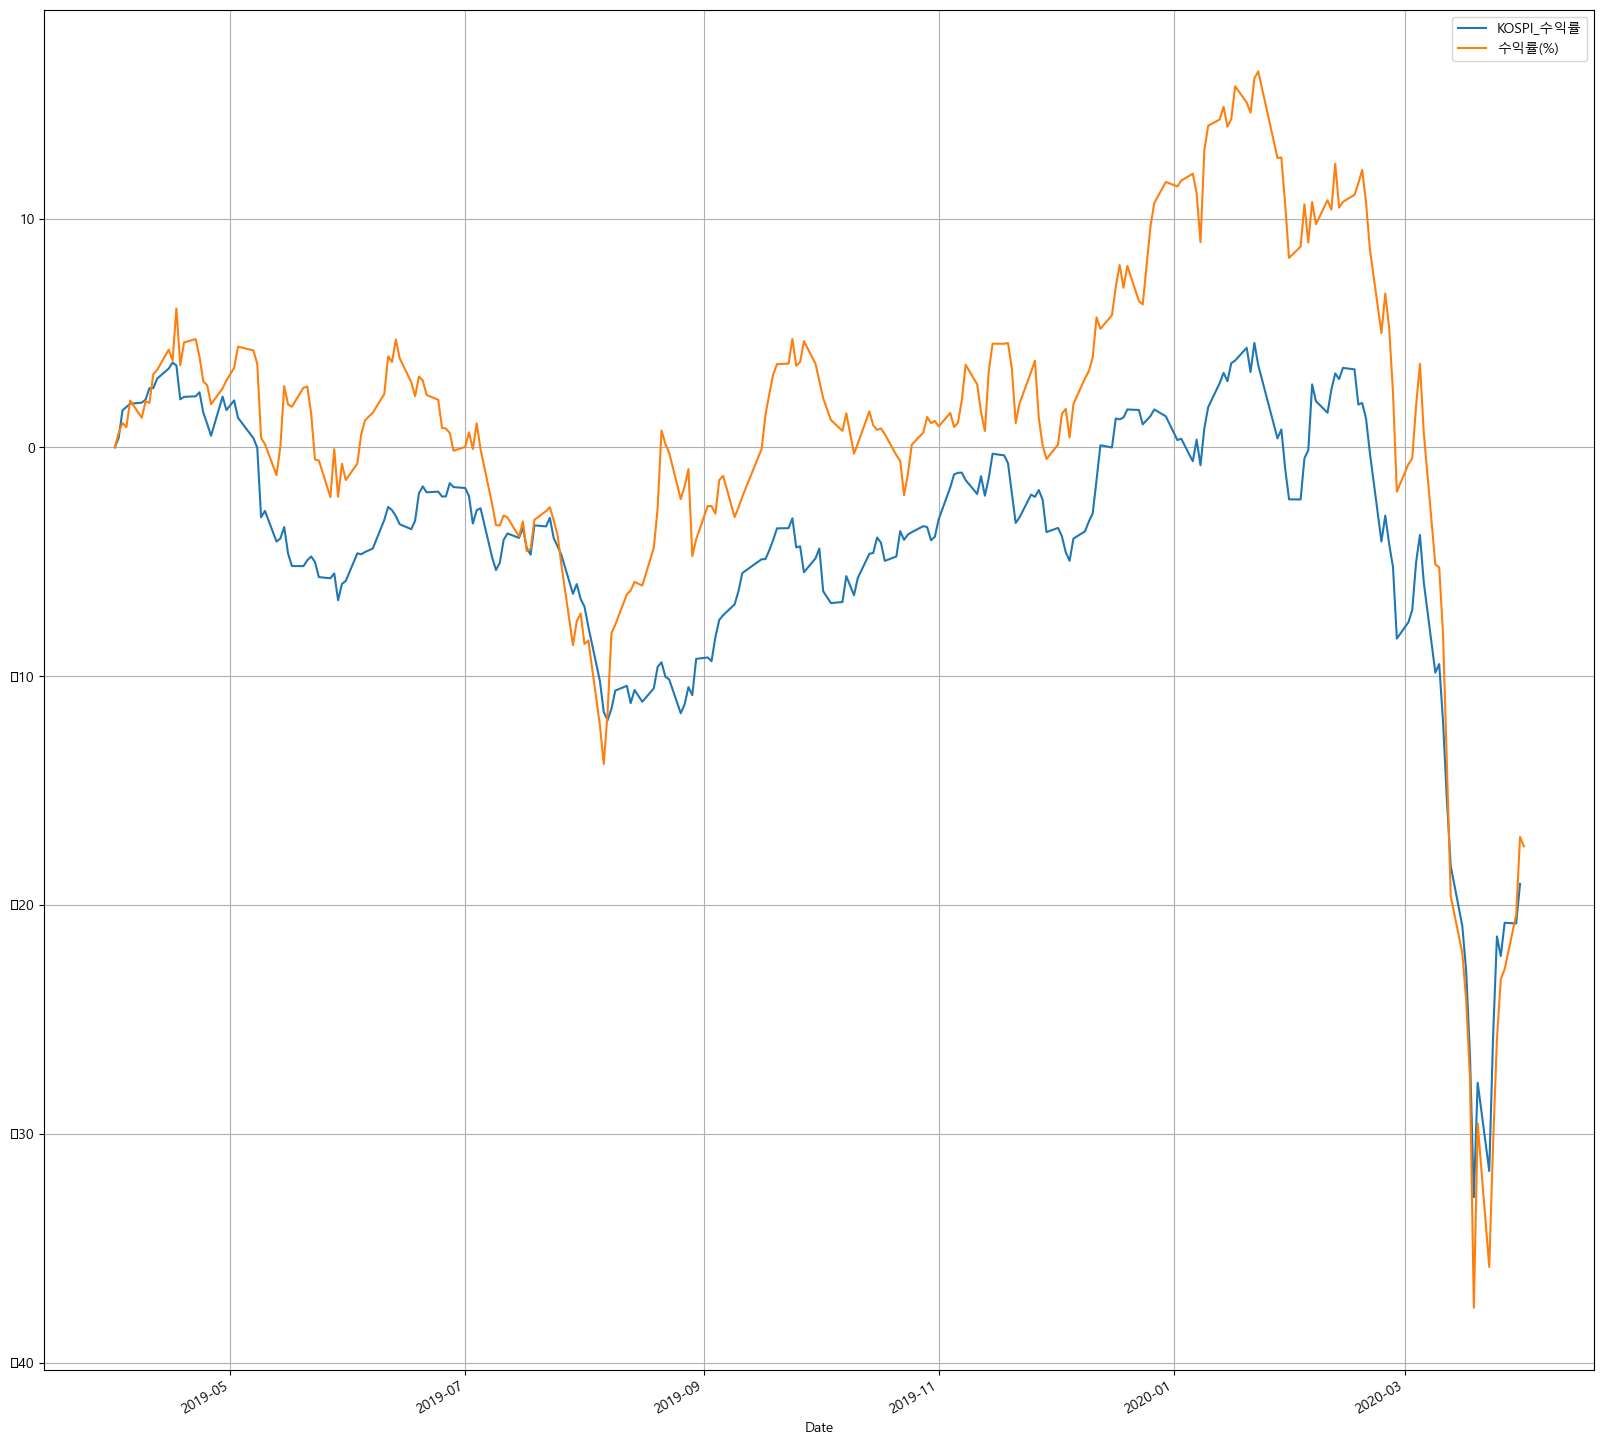

In [ ]:
# 백테스팅 기간 : 2019.04.01 ~ 2020.4.1
## 10개 돌리기
start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 1)

kospi_df = fdr.DataReader("KS11", start, end)
kospi_df["KOSPI_수익률"] = kospi_df["Close"]/kospi_df["Close"][0] - 1
kospi_df["KOSPI_수익률"] = kospi_df["KOSPI_수익률"]*100
kospi_df

invest_list = df_pred1signal0_select7.sort_values('PEG').head(10).index

df_compare = pd.DataFrame()
  

for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]
    

for i in invest_list:
    df_compare[i] = df_compare[i]/df_compare[i][0] - 1


df_compare["수익률(%)"] = df_compare[invest_list[0]]

for i in invest_list:
    df_compare["수익률(%)"] = df_compare[i] + df_compare["수익률(%)"]
df_compare["수익률(%)"] = df_compare["수익률(%)"] - df_compare[invest_list[0]]
df_compare["수익률(%)"] = df_compare["수익률(%)"]/10
df_compare["수익률(%)"] = df_compare["수익률(%)"]*100

df_plot0 = pd.concat([kospi_df, df_compare],axis=1)
df_plot0.plot(y = ["KOSPI_수익률", "수익률(%)"], figsize = [20,20], grid = True)

In [ ]:
def get_return_sl(code, short, long):
    
    # 백테스팅 기간 : 2019.04.01 ~ 2020.04.01
    start = datetime.datetime(2019, 4, 1)
    end = datetime.datetime(2020, 4, 1)

    df = fdr.DataReader(code, start, end)
    df = df[['Close']].copy()

    df['ma1'] = df['Close'].rolling(short).mean().shift(1)
    df['ma2'] = df['Close'].rolling(long).mean().shift(1)

    df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

    df.iloc[-1, -1] = 'sell'

    cond1 = ( df['action'] == 'buy') & ( df['action'].shift(1) == 'sell')
    cond2 = ( df['action'] == 'sell') & ( df['action'].shift(1) == 'buy')

    df_buy = df[cond1].reset_index()
    df_buy.columns = ['날짜', '종가(buy)', '이평3일', '이평30일', '결정']

    df_sell = df[cond2].reset_index()
    df_sell.columns = ['날짜', '종가(sell)', '이평3일', '이평30일', '결정']

    df_result = pd.concat([df_buy, df_sell], axis = 1)

    df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)'] 

    df_final = (df_result[['수익률']].cumprod().tail(1) -1)*100

    df_final['단기 이평'] = short
    df_final['장기 이평'] = long

    return df_final

invest_list = df_pred1signal0_select7.sort_values('PEG').head(10).index

dfs = list()
for i in invest_list:
    dfs.append(get_return_sl(i, 20 ,60))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/10)
df_result

-6.422400661562813


,수익률,단기 이평,장기 이평
0,-9.918352,20,60
1,-12.997831,20,60
2,-8.181075,20,60
3,-36.203418,20,60
4,-27.278048,20,60
5,-10.593940,20,60
6,66.458073,20,60
7,-24.737132,20,60
8,16.776316,20,60
9,-17.548599,20,60


In [ ]:
invest_list = df_pred1signal0_select7.sort_values('PEG').head(10).index
df_compare = pd.DataFrame()
for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]

df_compare["sum"] = df_compare[invest_list[0]]
for i in invest_list:
    df_compare["sum"] = df_compare[i] + df_compare["sum"]
df_compare["sum"] = df_compare["sum"] - df_compare[invest_list[0]]

MDD_list.append(round(DD(df_compare),2))


df_compare["전날대비수익률"] = (df_compare["sum"] - df_compare["sum"].shift(1))/df_compare["sum"]
VOL = np.std(df_compare["전날대비수익률"]) * np.sqrt(len(df_compare["전날대비수익률"]))
SHARP = (-0.06422 - 0.0150)/VOL
VOL_list.append(VOL)
SHARP_list.append(SHARP)


print("DD = ", DD(df_compare))
print("VOL = ", VOL)
print("SHARP = ", SHARP)

DD =  49.998046515262295
VOL =  0.3534154594765933
SHARP =  -0.22415544616334684


In [ ]:
## 포트폴리오 8 (PEG, 매출액순이익률, 매출액증가율) 상위 10개

df_pred1signal0_select8 = df_pred1signal0.loc[((df_pred1signal0['PEG'] > 0) & (df_pred1signal0['PEG'] <= 1.5)) &
                    (df_pred1signal0['성장비용비율'] >= 0.02)]
 


df_pred1signal0_select8.sort_values('PEG').head(10)

,회계년도,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG,성장비용비율
거래소코드,,,,,,,,,,,,,,,,,,
131290,2018,0.980,10.425,30.0,184431173.0,6.94,-0.71,6359297.0,14834007.0,1.09,6530.0,(주)티에스이,0.123589,2,111.332312,1,0.068868,0.034481
035610,2018,1.105,15.140,20.0,84440587.0,11.92,13.94,8078048.0,15327893.0,0.49,4470.0,(주)솔본,0.026182,2,-9.619687,0,0.147849,0.095665
051160,2018,4.700,14.720,20.0,131555043.0,0.74,30.94,4488800.0,1172741.0,9.59,3225.0,(주)지어소프트,1.361293,2,30.232558,1,0.153027,0.034121
093320,2018,1.805,9.965,30.0,56304485.0,22.14,19.07,9334004.0,13164858.0,0.87,24000.0,(주)케이아이엔엑스,0.071759,2,51.875000,1,0.250156,0.165777
086670,2018,1.180,10.965,20.0,76878609.0,9.02,20.80,3988187.0,8207253.0,1.24,7360.0,(주)비엠티,0.654150,0,-7.880435,0,0.287419,0.051876
056360,2018,0.725,6.255,20.0,55093572.0,11.25,1.39,6103725.0,-842823.0,0.57,7220.0,코위버(주),0.296109,2,22.437673,1,0.347172,0.110788
085910,2018,1.080,14.965,20.0,45195339.0,7.03,3.96,1321924.0,4693123.0,1.00,4250.0,(주)네오티스,0.856175,2,-10.588235,0,0.393327,0.029249
096240,2018,2.805,25.540,30.0,152690562.0,6.66,3.61,17105848.0,15774065.0,1.77,18450.0,(주)크레버스,0.395307,2,1.626016,0,0.513883,0.112030
011370,2018,0.760,5.270,30.0,529392970.0,2.11,12.92,44044361.0,12005224.0,3.51,1860.0,(주)서한,0.583324,1,-36.021505,0,0.571170,0.083198


<AxesSubplot: xlabel='Date'>

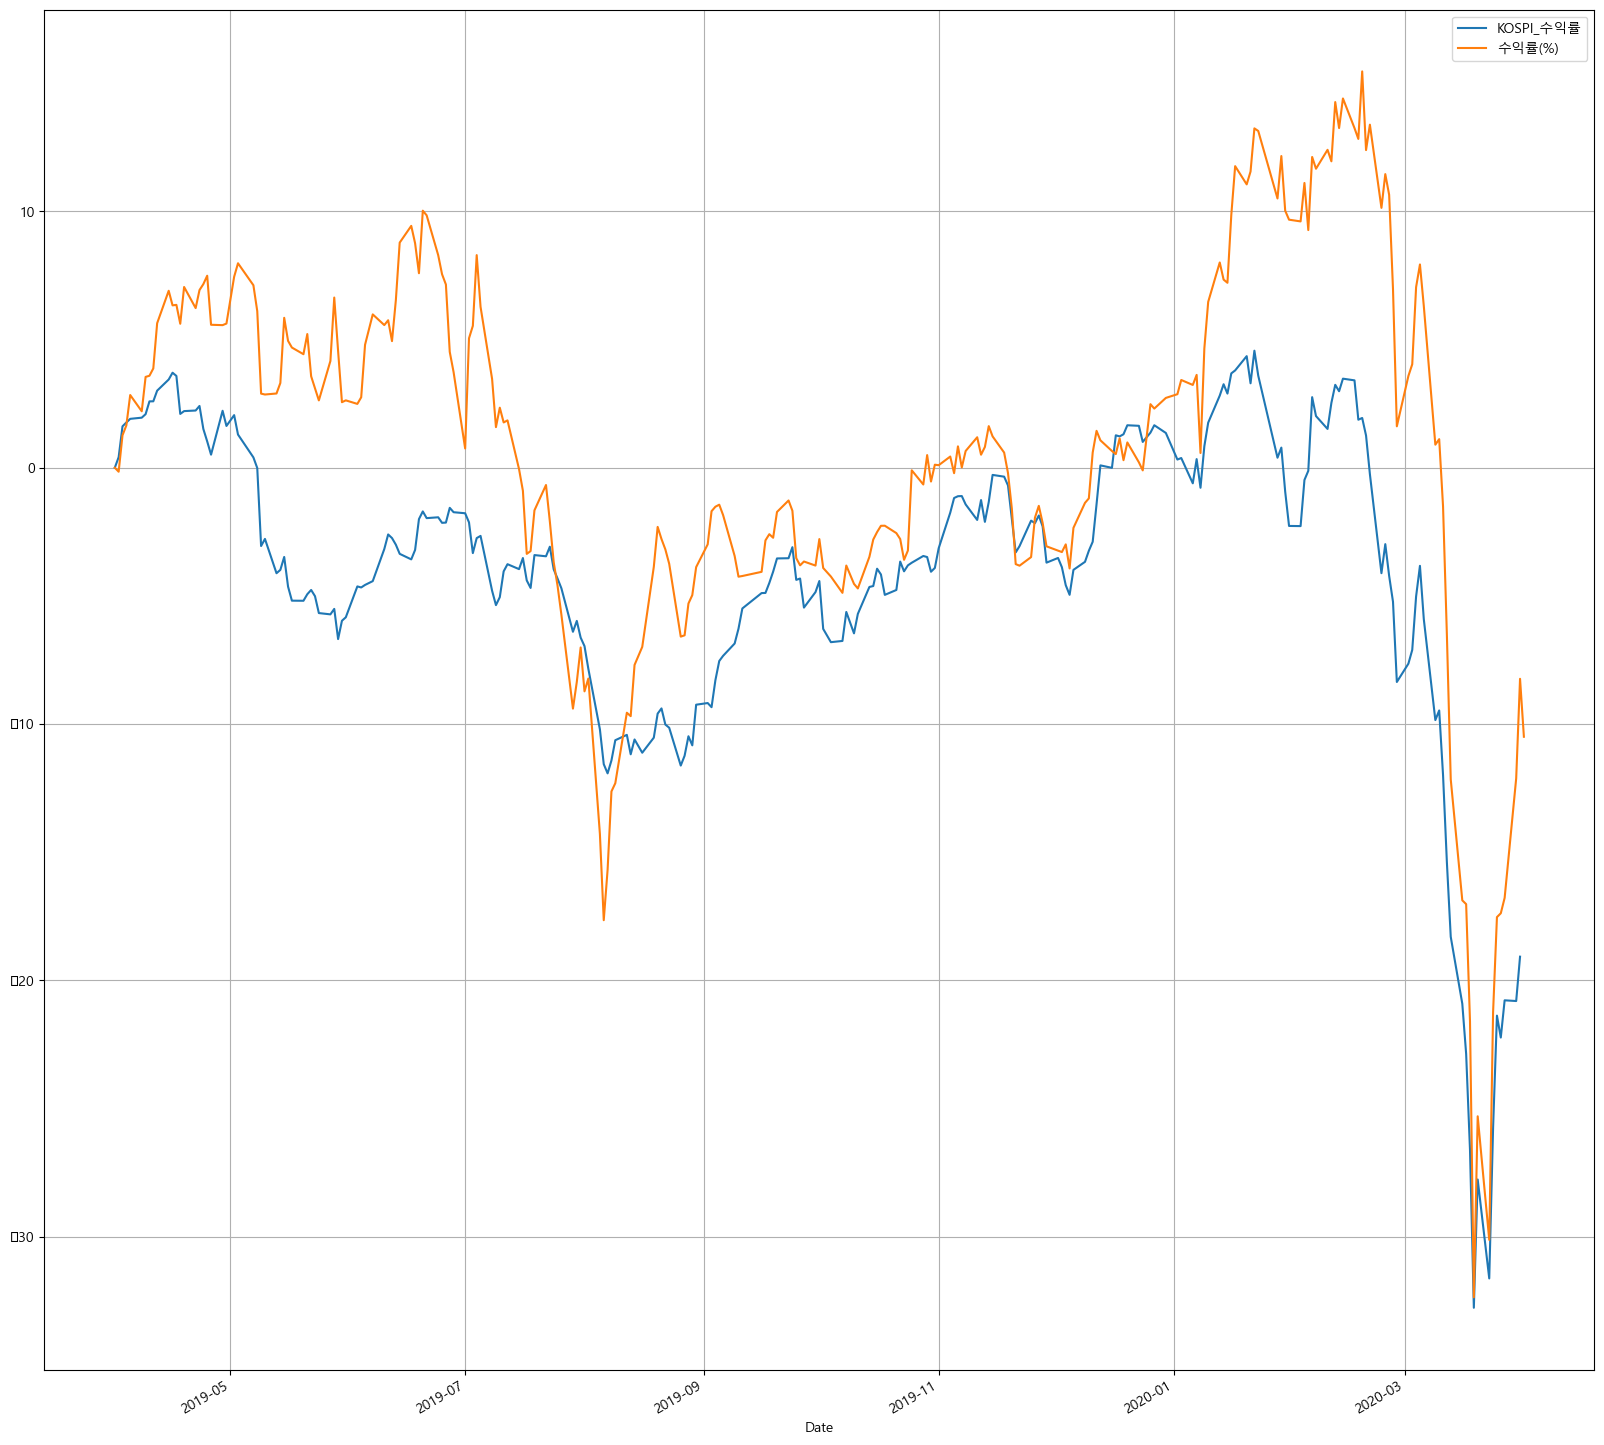

In [ ]:
# 백테스팅 기간 : 2019.04.01 ~ 2020.4.1
## 10개 돌리기
start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 1)

kospi_df = fdr.DataReader("KS11", start, end)
kospi_df["KOSPI_수익률"] = kospi_df["Close"]/kospi_df["Close"][0] - 1
kospi_df["KOSPI_수익률"] = kospi_df["KOSPI_수익률"]*100
kospi_df

invest_list = df_pred1signal0_select8.sort_values('PEG').head(10).index

df_compare = pd.DataFrame()
  

for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]
    

for i in invest_list:
    df_compare[i] = df_compare[i]/df_compare[i][0] - 1


df_compare["수익률(%)"] = df_compare[invest_list[0]]

for i in invest_list:
    df_compare["수익률(%)"] = df_compare[i] + df_compare["수익률(%)"]
df_compare["수익률(%)"] = df_compare["수익률(%)"] - df_compare[invest_list[0]]
df_compare["수익률(%)"] = df_compare["수익률(%)"]/10
df_compare["수익률(%)"] = df_compare["수익률(%)"]*100

df_plot0 = pd.concat([kospi_df, df_compare],axis=1)
df_plot0.plot(y = ["KOSPI_수익률", "수익률(%)"], figsize = [20,20], grid = True)

In [ ]:
def get_return_sl(code, short, long):
    
    # 백테스팅 기간 : 2019.04.01 ~ 2020.04.01
    start = datetime.datetime(2019, 4, 1)
    end = datetime.datetime(2020, 4, 1)

    df = fdr.DataReader(code, start, end)
    df = df[['Close']].copy()

    df['ma1'] = df['Close'].rolling(short).mean().shift(1)
    df['ma2'] = df['Close'].rolling(long).mean().shift(1)

    df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

    df.iloc[-1, -1] = 'sell'

    cond1 = ( df['action'] == 'buy') & ( df['action'].shift(1) == 'sell')
    cond2 = ( df['action'] == 'sell') & ( df['action'].shift(1) == 'buy')

    df_buy = df[cond1].reset_index()
    df_buy.columns = ['날짜', '종가(buy)', '이평3일', '이평30일', '결정']

    df_sell = df[cond2].reset_index()
    df_sell.columns = ['날짜', '종가(sell)', '이평3일', '이평30일', '결정']

    df_result = pd.concat([df_buy, df_sell], axis = 1)

    df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)'] 

    df_final = (df_result[['수익률']].cumprod().tail(1) -1)*100

    df_final['단기 이평'] = short
    df_final['장기 이평'] = long

    return df_final

invest_list = df_pred1signal0_select8.sort_values('PEG').head(10).index

dfs = list()
for i in invest_list:
    dfs.append(get_return_sl(i, 20 ,60))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/10)
df_result

-7.370043893923009


,수익률,단기 이평,장기 이평
0,66.458073,20,60
1,-16.269784,20,60
2,-22.987529,20,60
3,10.571017,20,60
4,-47.091289,20,60
5,-37.107447,20,60
6,-4.630788,20,60
7,-8.962691,20,60
8,-6.896552,20,60
9,-6.783449,20,60


In [ ]:
invest_list = df_pred1signal0_select8.sort_values('PEG').head(10).index
df_compare = pd.DataFrame()
for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]

df_compare["sum"] = df_compare[invest_list[0]]
for i in invest_list:
    df_compare["sum"] = df_compare[i] + df_compare["sum"]
df_compare["sum"] = df_compare["sum"] - df_compare[invest_list[0]]

MDD_list.append(round(DD(df_compare),2))


df_compare["전날대비수익률"] = (df_compare["sum"] - df_compare["sum"].shift(1))/df_compare["sum"]
VOL = np.std(df_compare["전날대비수익률"]) * np.sqrt(len(df_compare["전날대비수익률"]))
SHARP = (-0.0737 - 0.0150)/VOL
VOL_list.append(VOL)
SHARP_list.append(SHARP)


print("DD = ", DD(df_compare))
print("VOL = ", VOL)
print("SHARP = ", SHARP)

DD =  35.78121760762906
VOL =  0.34255335025187883
SHARP =  -0.25893776818933184
